### Visualizations

#### Environment: Scanpy

- **Developed by:** Carlos Talavera-López Ph.D
- **Modified by:** Alexandra Cirnu
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- **Date of creation:** 240726
- **Date of modification:** 240726

### Import required modules

In [230]:
import anndata
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
from pywaffle import Waffle
import matplotlib.pyplot as plt
import muon as mu
from muon import atac as ac
from muon import prot as pt
from scipy.sparse import csr_matrix

### Set up working environment

In [231]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                 10.2.0
asttokens           NA
colorama            0.4.6
comm                0.2.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.1
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
h5py                3.10.0
igraph              0.11.4
ipykernel           6.29.2
ipywidgets          8.1.2
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.8.3
matplotlib_inline   0.1.6
mpl_toolkits        NA
mudata              0.2.3
muon                0.1.5
natsort             8.4.0
numba               0.59.0
numpy               1.26.4
packaging           23.2
pandas              2.2.1
parso               0.8.3
patsy               0.5.6
pickleshare         0.7.5
platformdirs        4.2.0
prompt_toolkit      3.0.42
psutil              5.9.8
pure_eva

In [232]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')
%matplotlib inline

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                 10.2.0
asttokens           NA
colorama            0.4.6
comm                0.2.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.1
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
h5py                3.10.0
igraph              0.11.4
ipykernel           6.29.2
ipywidgets          8.1.2
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.8.3
matplotlib_inline   0.1.6
mpl_toolkits        NA
mudata              0.2.3
muon                0.1.5
natsort             8.4.0
numba               0.59.0
numpy               1.26.4
packaging           23.2
pandas              2.2.1
parso               0.8.3
patsy               0.5.6
pickleshare         0.7.5
platformdirs        4.2.0
prompt_toolkit      3.0.42
psutil              5.9.8
pure_eva

In [233]:
def stackedbars(adata, conditions, cmap, save_path=None):
    """
    Creates a stacked bar plot of cell proportions by condition and annotation.

    Parameters:
    - adata: AnnData object containing the dataset.
    - conditions: List of conditions to include in the plot.
    - cmap: List of colors for the stacked bars.
    - save_path: Optional path to save the plot image. If None, the plot is not saved.

    Returns:
    - ax: The matplotlib axis containing the plot.
    """
    # Group by condition and annotation, then count occurrences
    df_condition = adata.obs.groupby(['condition', 'annotation']).size().reset_index(name='counts')

    # Calculate the proportions
    total_counts = df_condition.groupby('condition')['counts'].transform('sum')
    df_condition['proportions'] = df_condition['counts'] / total_counts * 100

    # Filter for specific conditions
    df_Pkp2 = df_condition[df_condition['condition'].isin(conditions)]
    df_Pkp2 = df_Pkp2.set_index('condition').loc[conditions].reset_index()

    # Pivot the DataFrame to have 'condition' as rows and 'annotation' as columns
    pivot_df = df_Pkp2.pivot(index='condition', columns='annotation', values='proportions').fillna(0)

    # Plot the stacked bar plot
    plt.figure()  # Create a new figure
    ax = pivot_df.plot(kind='bar', stacked=True, color=cmap, edgecolor='none')
    plt.gcf().set_size_inches(7, 7)
    ax.grid(False)  # Remove the grid

    # Add labels and title
    plt.xlabel('')
    plt.ylabel('Proportion (%)')
    plt.title('')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300)
    
    plt.show()
    
    return ax

### Read in data

In [234]:
#Take the seed labelled data set of Pkp2_Ctr_noninf+Ttn_Ctr_noninf as input

mdata = mu.read_h5mu('/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_seed-label_new_annotation_muon_ac240725.raw.h5mu')     
mdata

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'lineage', 'phenotype', 'C_scANVI'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [235]:
adata = mdata.mod['rna']

In [236]:
def X_is_raw(adata): return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

X_is_raw(adata)

True

In [237]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
X_data_df

Shape of counts DataFrame: (44586, 29378)


,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Vmn2r122,Il11ra2-1,Ccl27a-1,Ccl21c-1,Ccl27a-2,Il11ra2-2,Ccl19-1,Ccl21a-1,Gm10931,Gm16367
AAACGCTGTTGTGTTG-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTTCTCGCTCA-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGGTACAGAACATA-1-A1,0,0,0,0,0,0,0,0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCAGGGACACT-1-A1,0,0,0,0,0,0,0,0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
AAAGTCCCAGTAGGAC-1-A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGAGAGATTAGCA-1-B2,0,0,0,0,0,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGTTAGCACCTGC-1-B2,0,0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGAGACCTCCG-1-B2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Clean adata.obs

In [238]:
adata

AnnData object with n_obs × n_vars = 44586 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'lineage', 'phenotype', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [239]:
adata.obs

,cell_source,donor,n_counts,sample,seed_labels,condition,genotype,infection,library,model,...,S_score,G2M_score,_scvi_batch,_scvi_labels,batch,leiden,classification,lineage,phenotype,C_scANVI
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,MØ_Elmo1+,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,-0.019995,-0.083225,6,8,reference,3,MØ_Elmo1+,myeloid,pro-inflammatory,MØ_Elmo1+
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,MØ_Elmo1+,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,-0.169221,-0.390143,6,8,reference,3,MØ_Elmo1+,myeloid,pro-inflammatory,MØ_Elmo1+
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Mono_Cd14+Ly6c+,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,-0.317632,-0.578955,7,6,reference,6,Mono_Cd14+Ly6c+,myeloid,pro-inflammatory,Mono_Cd14+Ly6c+
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,MØ_Mertk+Il10+,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,-0.370103,-0.370084,7,10,reference,2,MØ_Mertk+Il10+,myeloid,anti-inflammatory,MØ_Mertk+Il10+
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,MØ_Mertk+Il10+,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,-0.142503,-0.357287,7,10,reference,2,MØ_Mertk+Il10+,myeloid,anti-inflammatory,MØ_Mertk+Il10+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,12119.0,Ttn_HetKO_MCMV_1,cDC2,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,-0.267751,-0.531946,25,27,query,9,cDC2,lymphoid,pro-inflammatory,cDC2
TTTGGAGAGATTAGCA-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,20506.0,Ttn_Ctr_MCMV_2,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,...,2.905559,0.470866,21,29,query,2,cDC1,lymphoid,anti-inflammatory,cDC1
TTTGGTTAGCACCTGC-1-B2,AG_Gerull,Ttn_HetKO_MCMV_2,3174.0,Ttn_HetKO_MCMV_2,Tem_Cd8+,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.000996,-0.736926,26,21,query,7,Tem_Cd8+,lymphoid,pro-inflammatory,Tem_Cd8+
TTTGTTGAGACCTCCG-1-B2,AG_Gerull,Ttn_HetKO_noninf_2,4549.0,Ttn_HetKO_noninf_2,B-1a,Ttn_HetKO_noninf,Ttn_HetKO,noninf,B2,Ttn,...,-0.428444,-0.362500,29,1,query,13,B-1a,lymphoid,neutral,B-1a


In [240]:
adata.obs['annotation'] = adata.obs['C_scANVI'].copy()

annotation_to_lineage = {
    'B'                     :  'lymphoid',
    'B-1a'                  :  'lymphoid',
    'ILC2'                  :  'lymphoid',
    'NK'                    :  'lymphoid',
    'NKT'                   :  'lymphoid',
    'Teff_Cd8'              :  'lymphoid',
    'Tem/Trm-Cd8+'          :  'lymphoid',
    'Tem_Cd8+'              :  'lymphoid',
    'Th1_Cd4+'              :  'lymphoid',
    'Th17_Cd4+'             :  'lymphoid',
    'Treg'                  :  'lymphoid',
    'γδT'                   :  'lymphoid',
    'DCmigr'                : 'myeloid',
    'DCmono-derived'        : 'myeloid',
    'Mast'                  : 'myeloid',
    'Mono_Cd14+Ly6c+'       : 'myeloid',
    'Mono_Cd16+'            : 'myeloid',
    'MØ_Elmo1+'             : 'myeloid',
    'MØ_MHC-II+Ccl3+'       : 'myeloid',
    'MØ_Mertk+Il10+'        : 'myeloid',
    'MØ_Rentla+Il10+'       : 'myeloid',
    'MØ_Stab1+'             : 'myeloid',
    'MØ_Tgfb1+Il1b+'        : 'myeloid',
    'MØtr_Spp1+Trem2+'      : 'myeloid',
    'MØtr_TLF+'             : 'myeloid',
    'Neutrophil'            : 'myeloid',
    'cDC1'                  : 'myeloid',
    'cDC2'                  : 'myeloid',
    'pDC'                   : 'myeloid',
}

general_annotation = {
    'B'                     :  'B_cell',
    'B-1a'                  :  'B_cell',
    'ILC2'                  :  'NK_cell',
    'NK'                    :  'NK_cell',
    'NKT'                   :  'NK_cell',
    'Teff_Cd8'              :  'Cd8_T_cell',
    'Tem/Trm-Cd8+'          :  'Cd8_T_cell',
    'Tem_Cd8+'              :  'Cd8_T_cell',
    'Th1_Cd4+'              :  'Cd4_T_cell',
    'Th17_Cd4+'             :  'Cd4_T_cell',
    'Treg'                  :  'Cd4_T_cell',  # Grouping Tregs under CD4 T cells
    'γδT'                   :  'Cd8_T_cell',  # Grouping γδT cells under CD8 T cells
    'DCmigr'                : 'DC',
    'DCmono-derived'        : 'DC',
    'Mast'                  : 'Monocyte',
    'Mono_Cd14+Ly6c+'       : 'Monocyte',
    'Mono_Cd16+'            : 'Monocyte',
    'MØ_Elmo1+'             : 'Macrophage',
    'MØ_MHC-II+Ccl3+'       : 'Macrophage',
    'MØ_Mertk+Il10+'        : 'Macrophage',
    'MØ_Rentla+Il10+'       : 'Macrophage',
    'MØ_Stab1+'             : 'Macrophage',
    'MØ_Tgfb1+Il1b+'        : 'Macrophage',
    'MØtr_Spp1+Trem2+'      : 'Macrophage',
    'MØtr_TLF+'             : 'Macrophage',
    'Neutrophil'            : 'Neutrophil',
    'cDC1'                  : 'DC',
    'cDC2'                  : 'DC',
    'pDC'                   : 'DC',
}
del(adata.obs['lineage'])
adata.obs['lineage'] = adata.obs['annotation'].map(annotation_to_lineage)
adata.obs['general_celltype'] = adata.obs['annotation'].map(general_annotation)
del(adata.obs['C_scANVI'])
del(adata.obs['seed_labels'])
adata.obs

,cell_source,donor,n_counts,sample,condition,genotype,infection,library,model,n_genes_by_counts,...,G2M_score,_scvi_batch,_scvi_labels,batch,leiden,classification,phenotype,annotation,lineage,general_celltype
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,365.0,...,-0.083225,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Macrophage
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,1599.0,...,-0.390143,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Macrophage
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3854.0,...,-0.578955,7,6,reference,6,Mono_Cd14+Ly6c+,pro-inflammatory,Mono_Cd14+Ly6c+,myeloid,Monocyte
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3788.0,...,-0.370084,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,Macrophage
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3493.0,...,-0.357287,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,Macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,12119.0,Ttn_HetKO_MCMV_1,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,2704.0,...,-0.531946,25,27,query,9,cDC2,pro-inflammatory,cDC2,myeloid,DC
TTTGGAGAGATTAGCA-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,20506.0,Ttn_Ctr_MCMV_2,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,4156.0,...,0.470866,21,29,query,2,cDC1,anti-inflammatory,cDC1,myeloid,DC
TTTGGTTAGCACCTGC-1-B2,AG_Gerull,Ttn_HetKO_MCMV_2,3174.0,Ttn_HetKO_MCMV_2,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,1436.0,...,-0.736926,26,21,query,7,Tem_Cd8+,pro-inflammatory,Tem_Cd8+,lymphoid,Cd8_T_cell
TTTGTTGAGACCTCCG-1-B2,AG_Gerull,Ttn_HetKO_noninf_2,4549.0,Ttn_HetKO_noninf_2,Ttn_HetKO_noninf,Ttn_HetKO,noninf,B2,Ttn,1710.0,...,-0.362500,29,1,query,13,B-1a,neutral,B-1a,lymphoid,B_cell


In [241]:
adata_raw = adata.copy()

In [242]:
adata_toplot = anndata.AnnData(X = np.sqrt(sc.pp.normalize_total(adata_raw, inplace = False)["X"]), var = adata_raw.var, obs = adata.obs, obsm = adata.obsm)
adata_toplot

normalizing counts per cell


    finished (0:00:00)


AnnData object with n_obs × n_vars = 44586 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Cell type proportions

All cell types splitted by model and myeloids+lymphoids splited by model

In [243]:
cmap_ac = ['#FEEFC6','#FDDF8E','#FFAF7A','#FF6700','#C15817','#8F2D40','#D5116D','#DE8CBE', '#BD35D5', '#7F248F','#7818DE', '#120C91', '#1B11D4', '#1A9BFF', '#87E1FF',  '#C2EDFF', '#AFEEEE', '#00CED1', '#349189', 
                          '#09B380','#6AD49B', '#AFF6BD', '#04D400', '#029100', '#026F00','#ADB300', '#D3E200', '#FFE500', '#E3C100']  
cmap_myeloids = ['#FFAF7A','#FF6700','#8F2D40','#D5116D','#DE8CBE', '#BD35D5', '#7F248F','#7818DE', '#120C91', '#1B11D4', '#1A9BFF', '#87E1FF',  '#C2EDFF',  '#349189', '#ADB300', '#D3E200', '#FFE500']  
cmap_lymphoids = ['#FEEFC6','#FDDF8E','#C15817', '#AFEEEE', '#00CED1', '#09B380','#6AD49B', '#AFF6BD', '#04D400', '#029100', '#026F00', '#E3C100']
cmap_conditions = ['#D3D3D3','#F88379','#3A3B3C','#DA0024'] 
adata_myeloids = adata[adata.obs['lineage'].isin(["myeloid"]) , :]
adata_lymphoids = adata[adata.obs['lineage'].isin(["lymphoid"]) , :]
Pkp2_conditions = ["Pkp2_Ctr_noninf", "Pkp2_HetKO_noninf","Pkp2_Ctr_MCMV", "Pkp2_HetKO_MCMV"]
Ttn_conditions = ["Ttn_Ctr_noninf", "Ttn_HetKO_noninf","Ttn_Ctr_MCMV", "Ttn_HetKO_MCMV"]

Pkp2 - all celltypes

<Figure size 720x720 with 0 Axes>

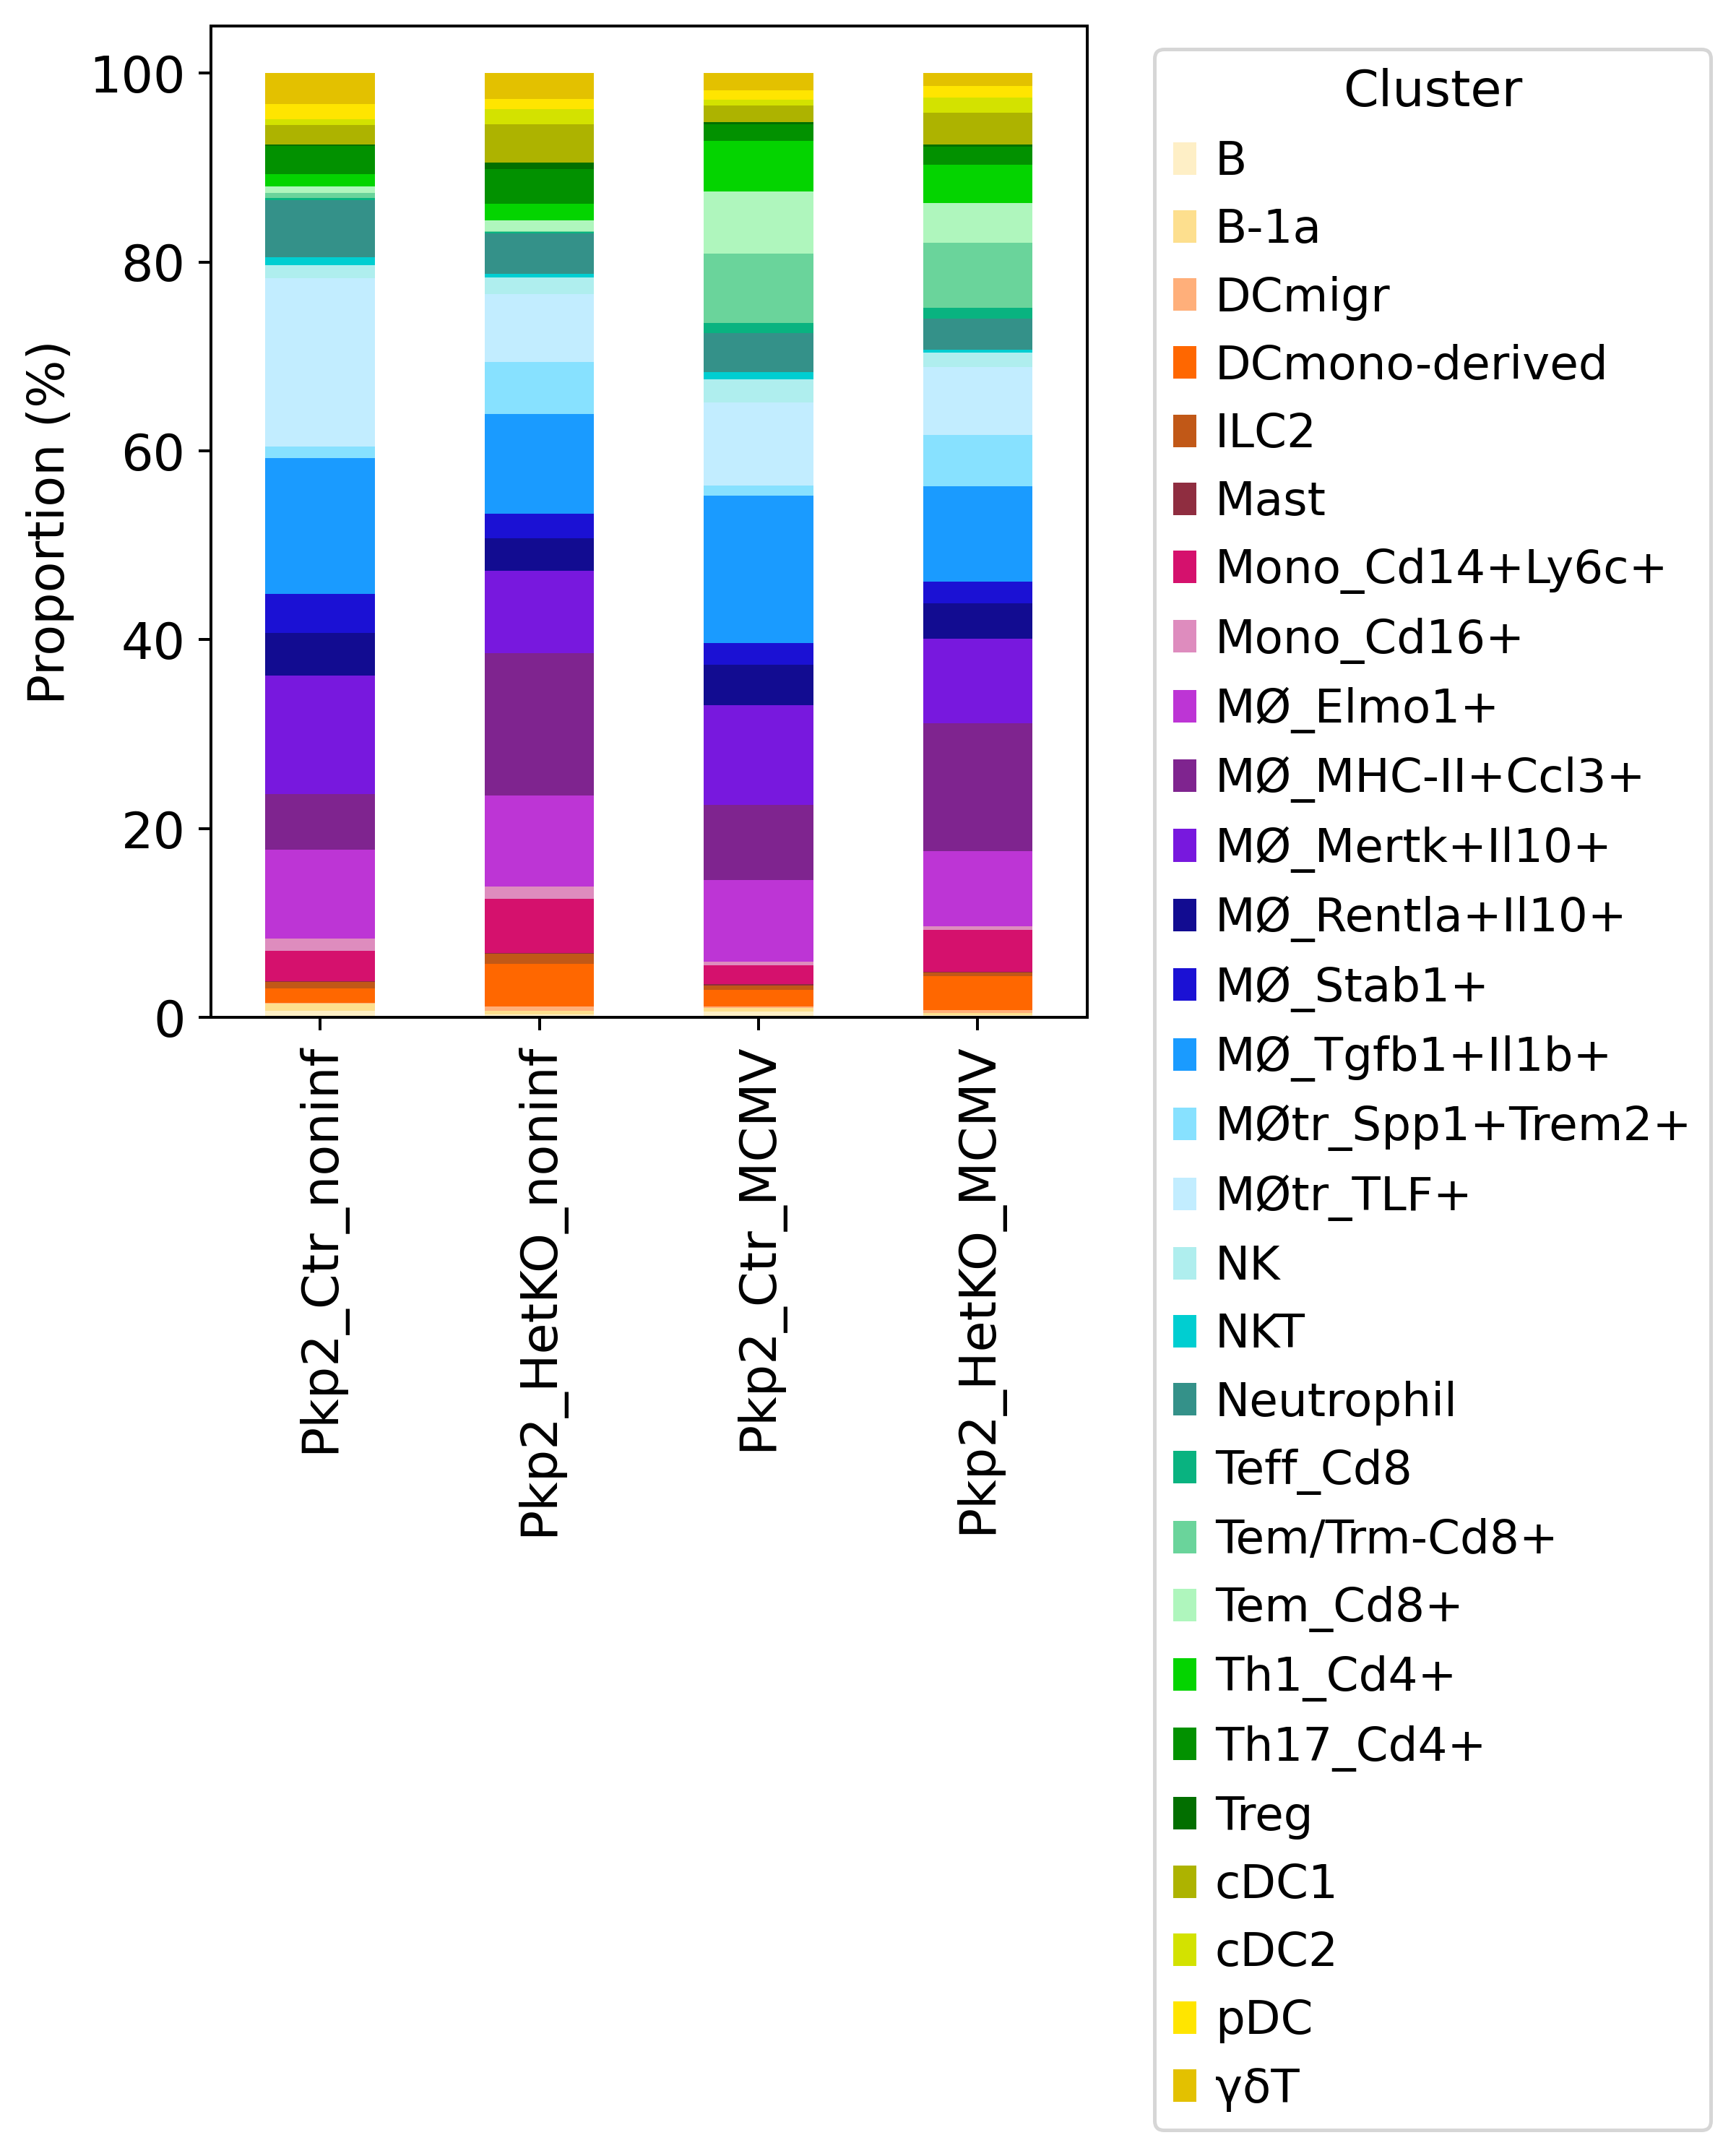

<Axes: ylabel='Proportion (%)'>

In [244]:
stackedbars(adata, Pkp2_conditions, cmap_ac, save_path='Pkp2_proportions_stacked_barplot.png')

Pkp2 - myeloids

<Figure size 720x720 with 0 Axes>

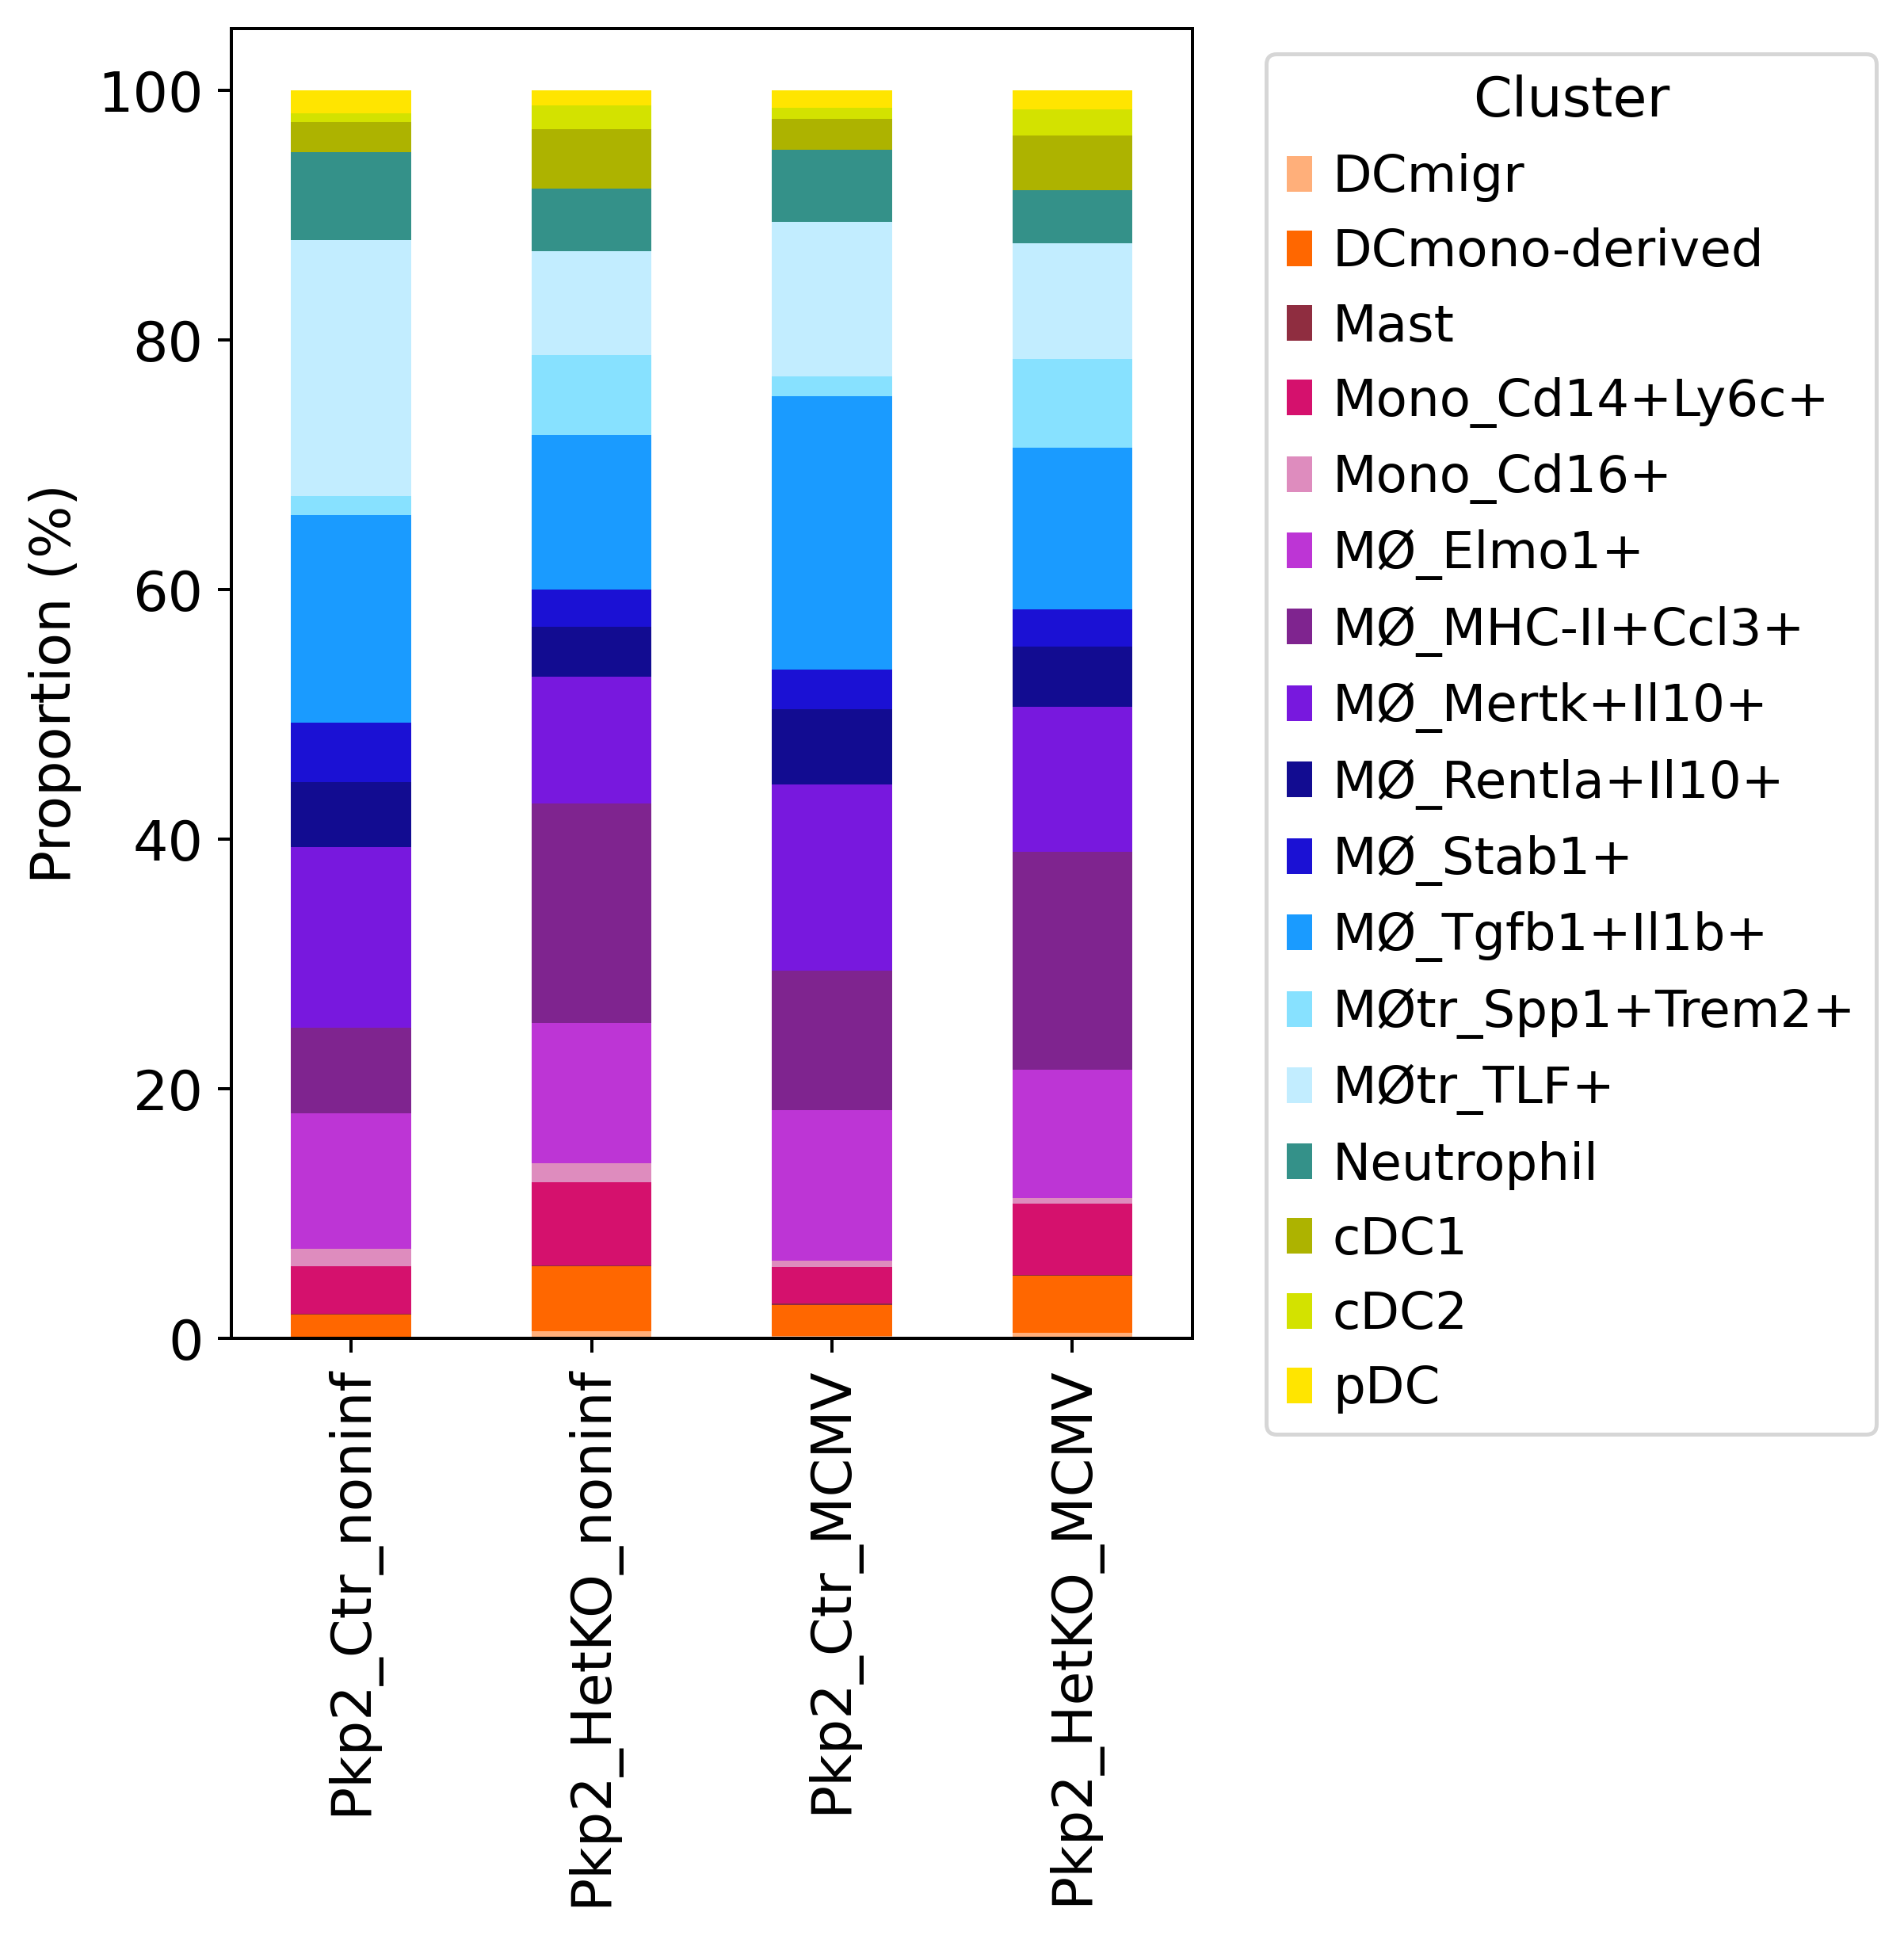

<Axes: ylabel='Proportion (%)'>

In [245]:
stackedbars(adata_myeloids, Pkp2_conditions, cmap_myeloids, save_path='Pkp2_proportions_myeloids_stacked_barplot.png')

Pkp2 - lymphoids

<Figure size 720x720 with 0 Axes>

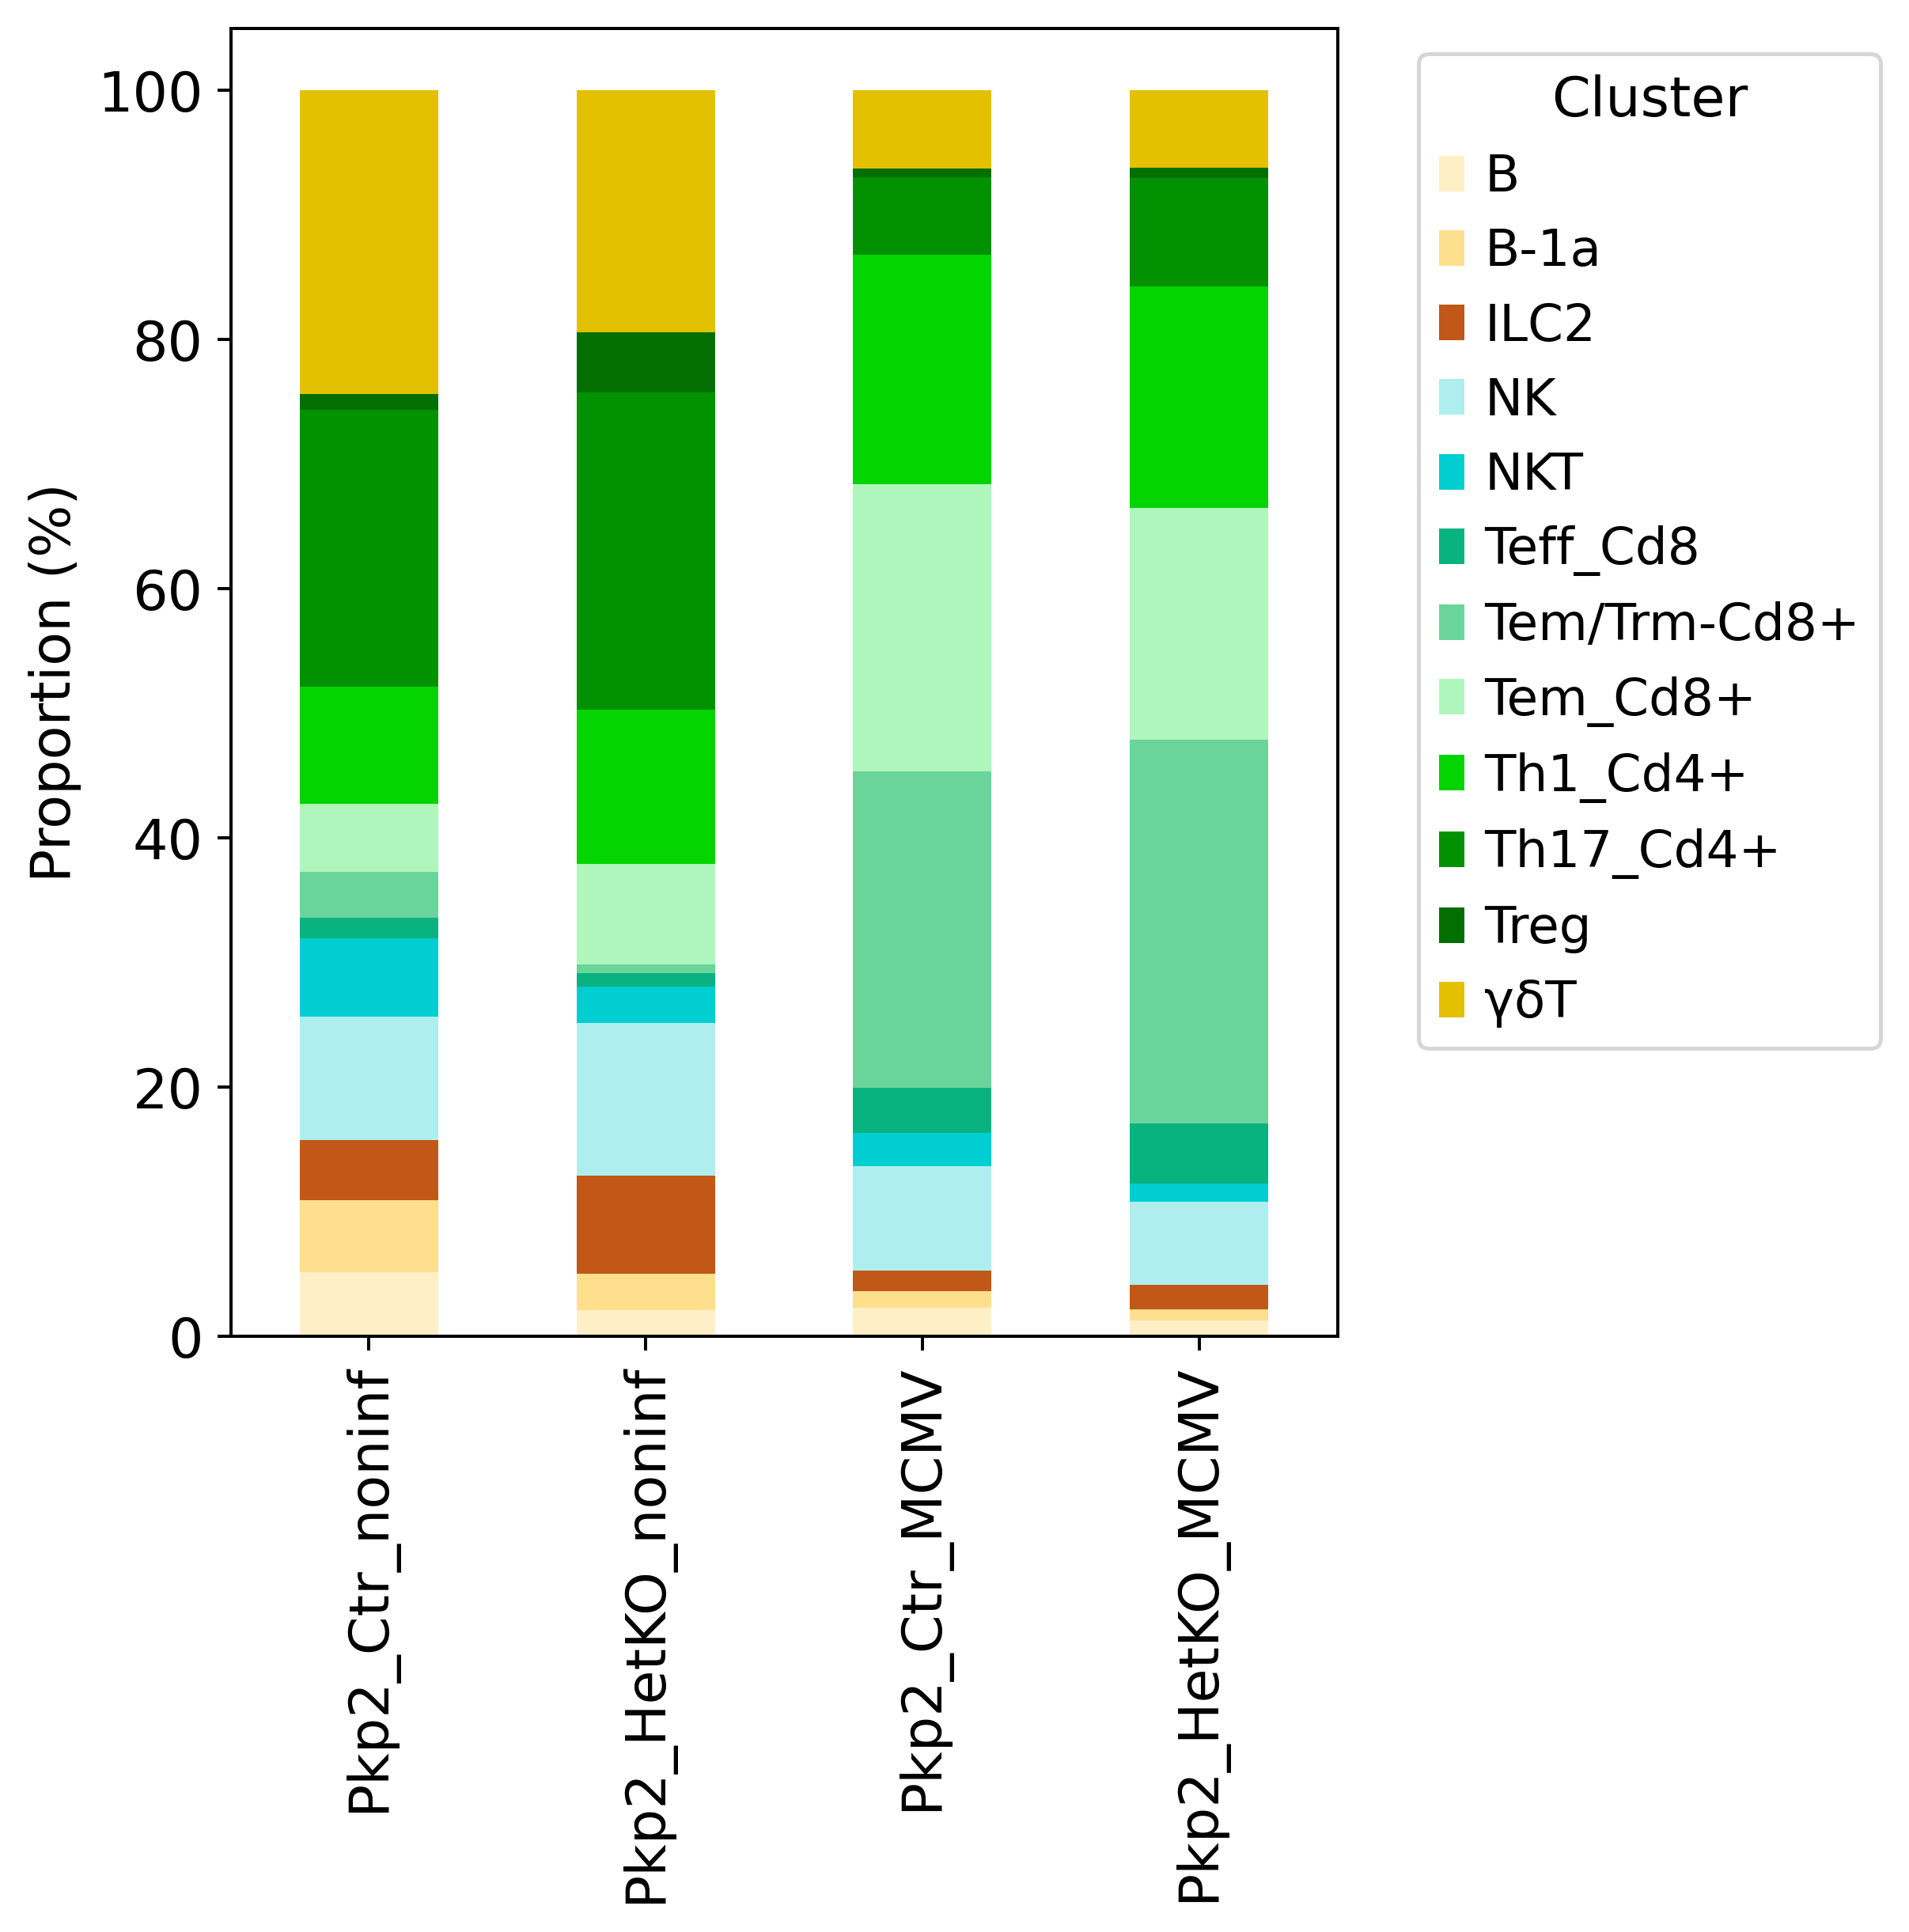

<Axes: ylabel='Proportion (%)'>

In [246]:
stackedbars(adata_lymphoids, Pkp2_conditions, cmap_lymphoids, save_path='Pkp2_proportions_lymphoids_stacked_barplot.png')

Ttn - all celltypes

<Figure size 720x720 with 0 Axes>

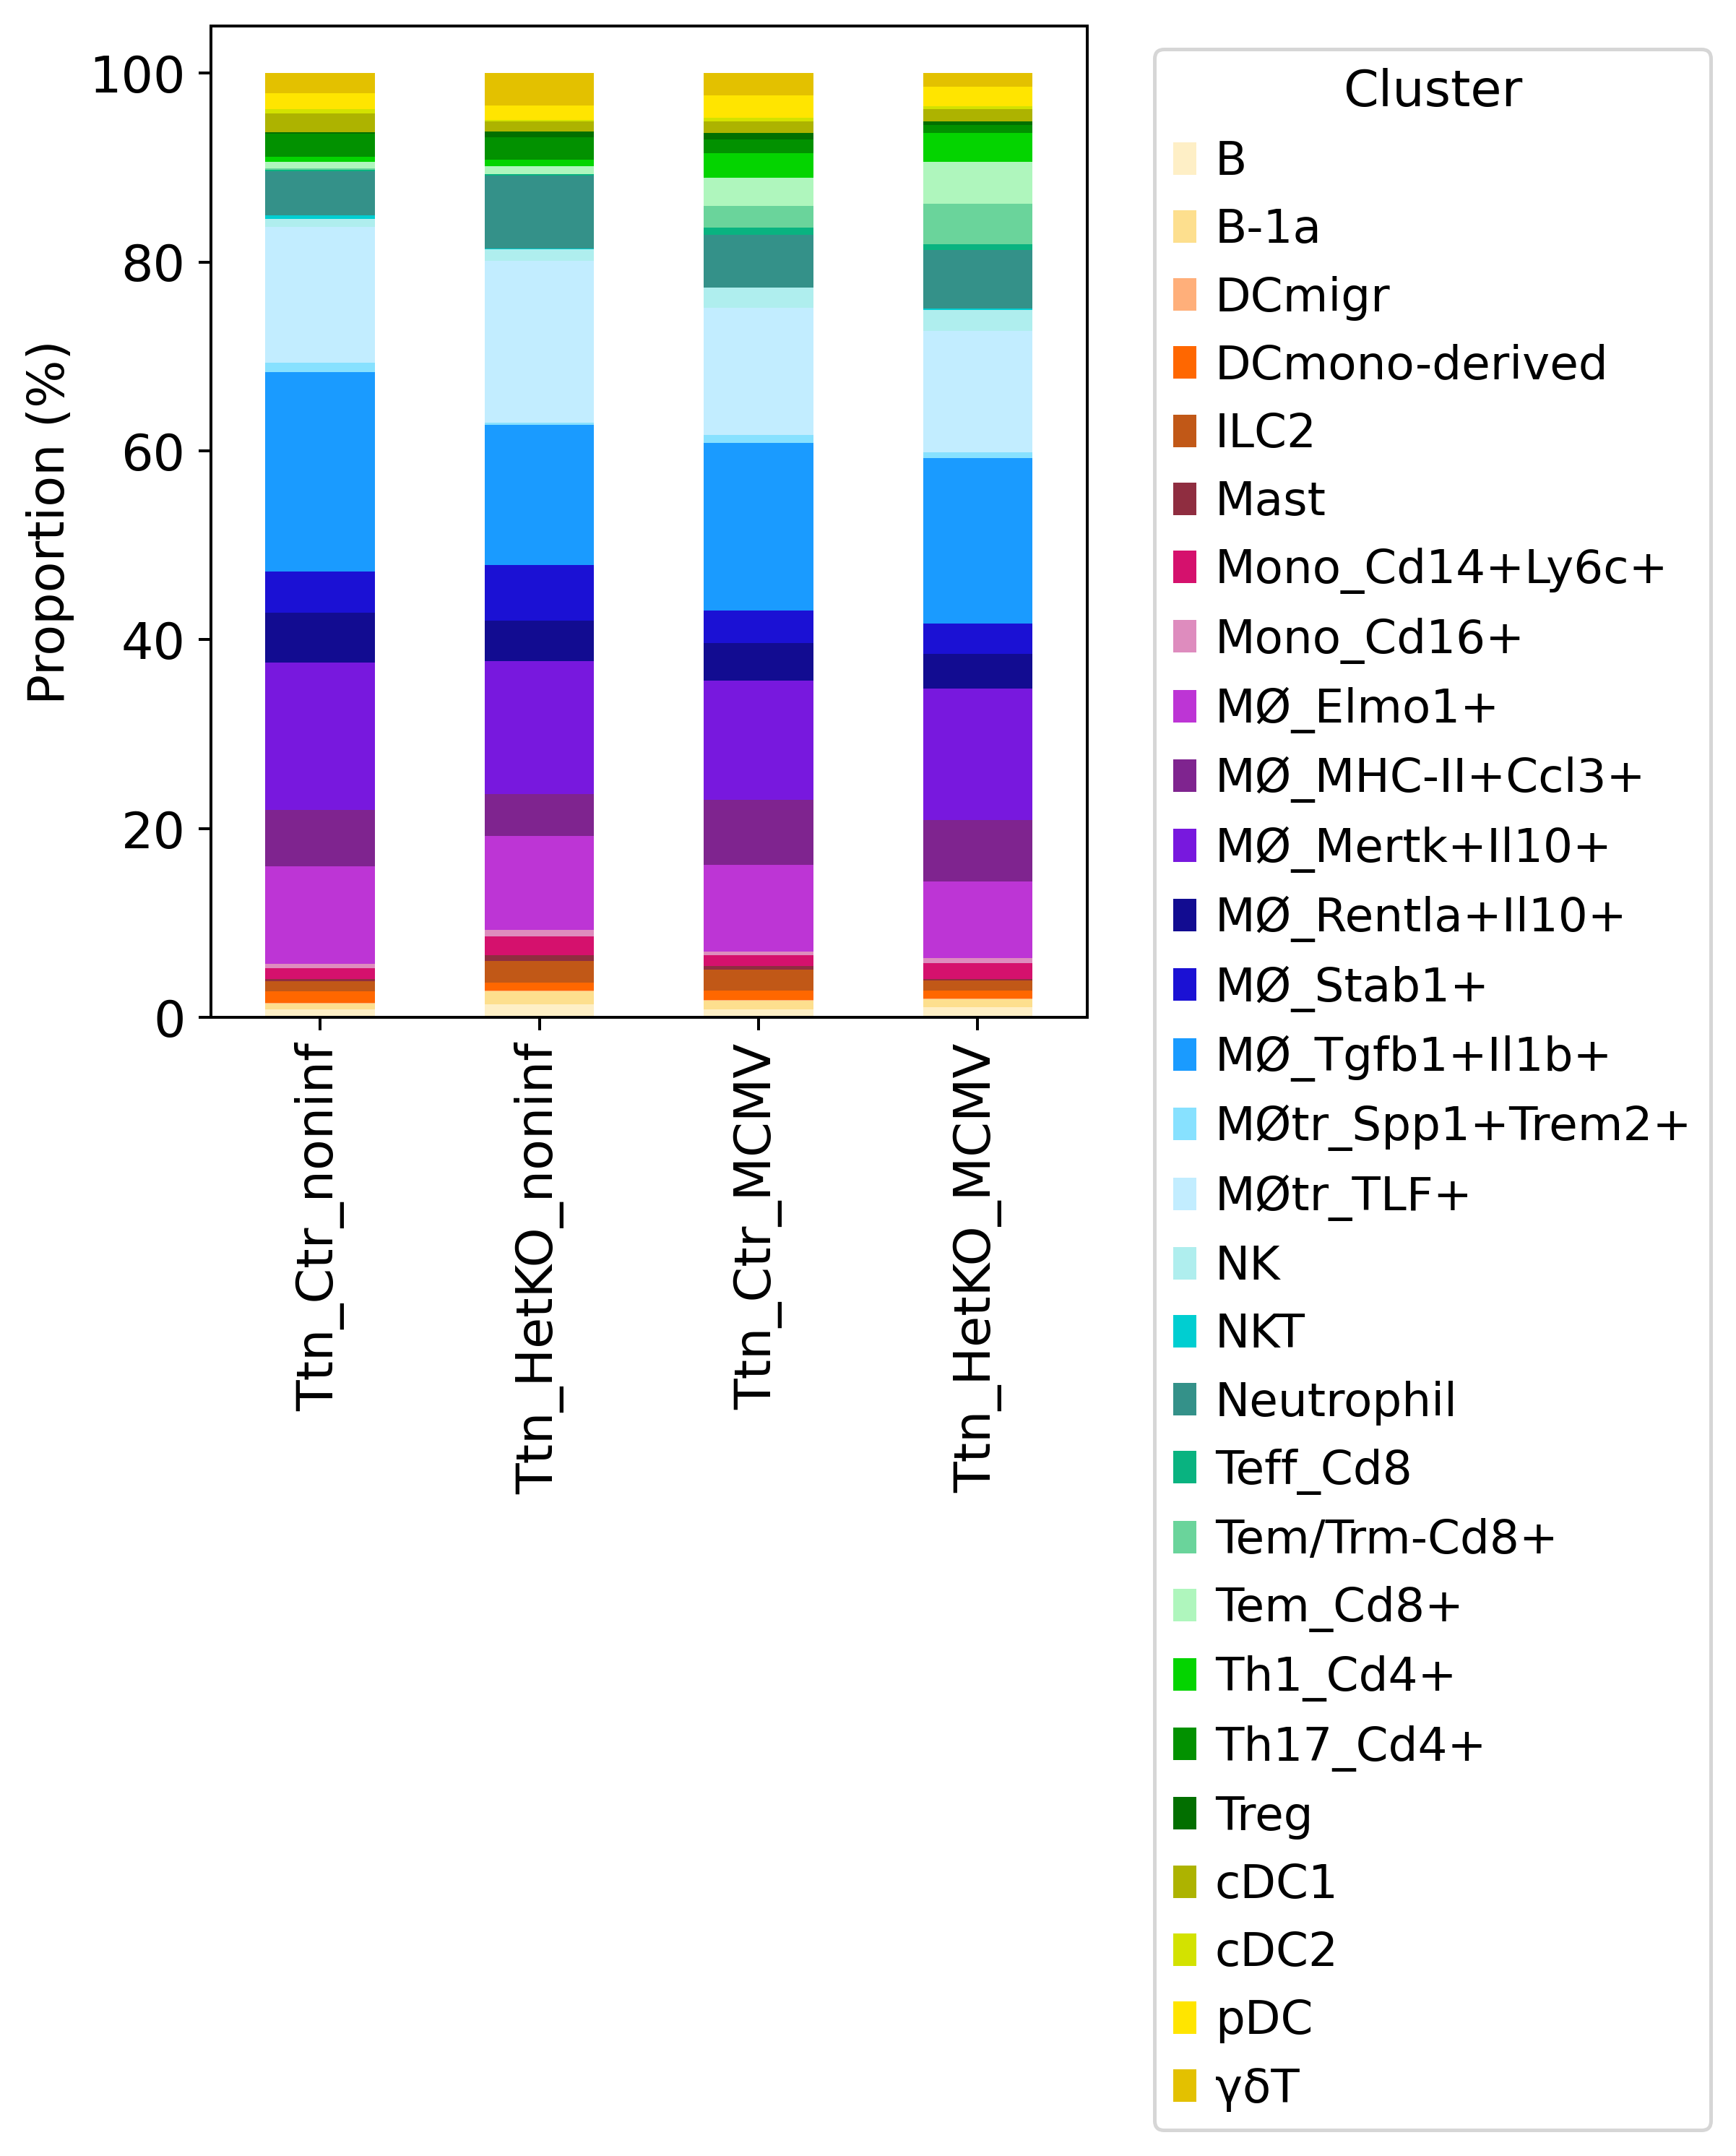

<Axes: ylabel='Proportion (%)'>

In [247]:
stackedbars(adata, Ttn_conditions, cmap_ac, save_path='Ttn_proportions_stacked_barplot.png')

Ttn - myeloids

<Figure size 720x720 with 0 Axes>

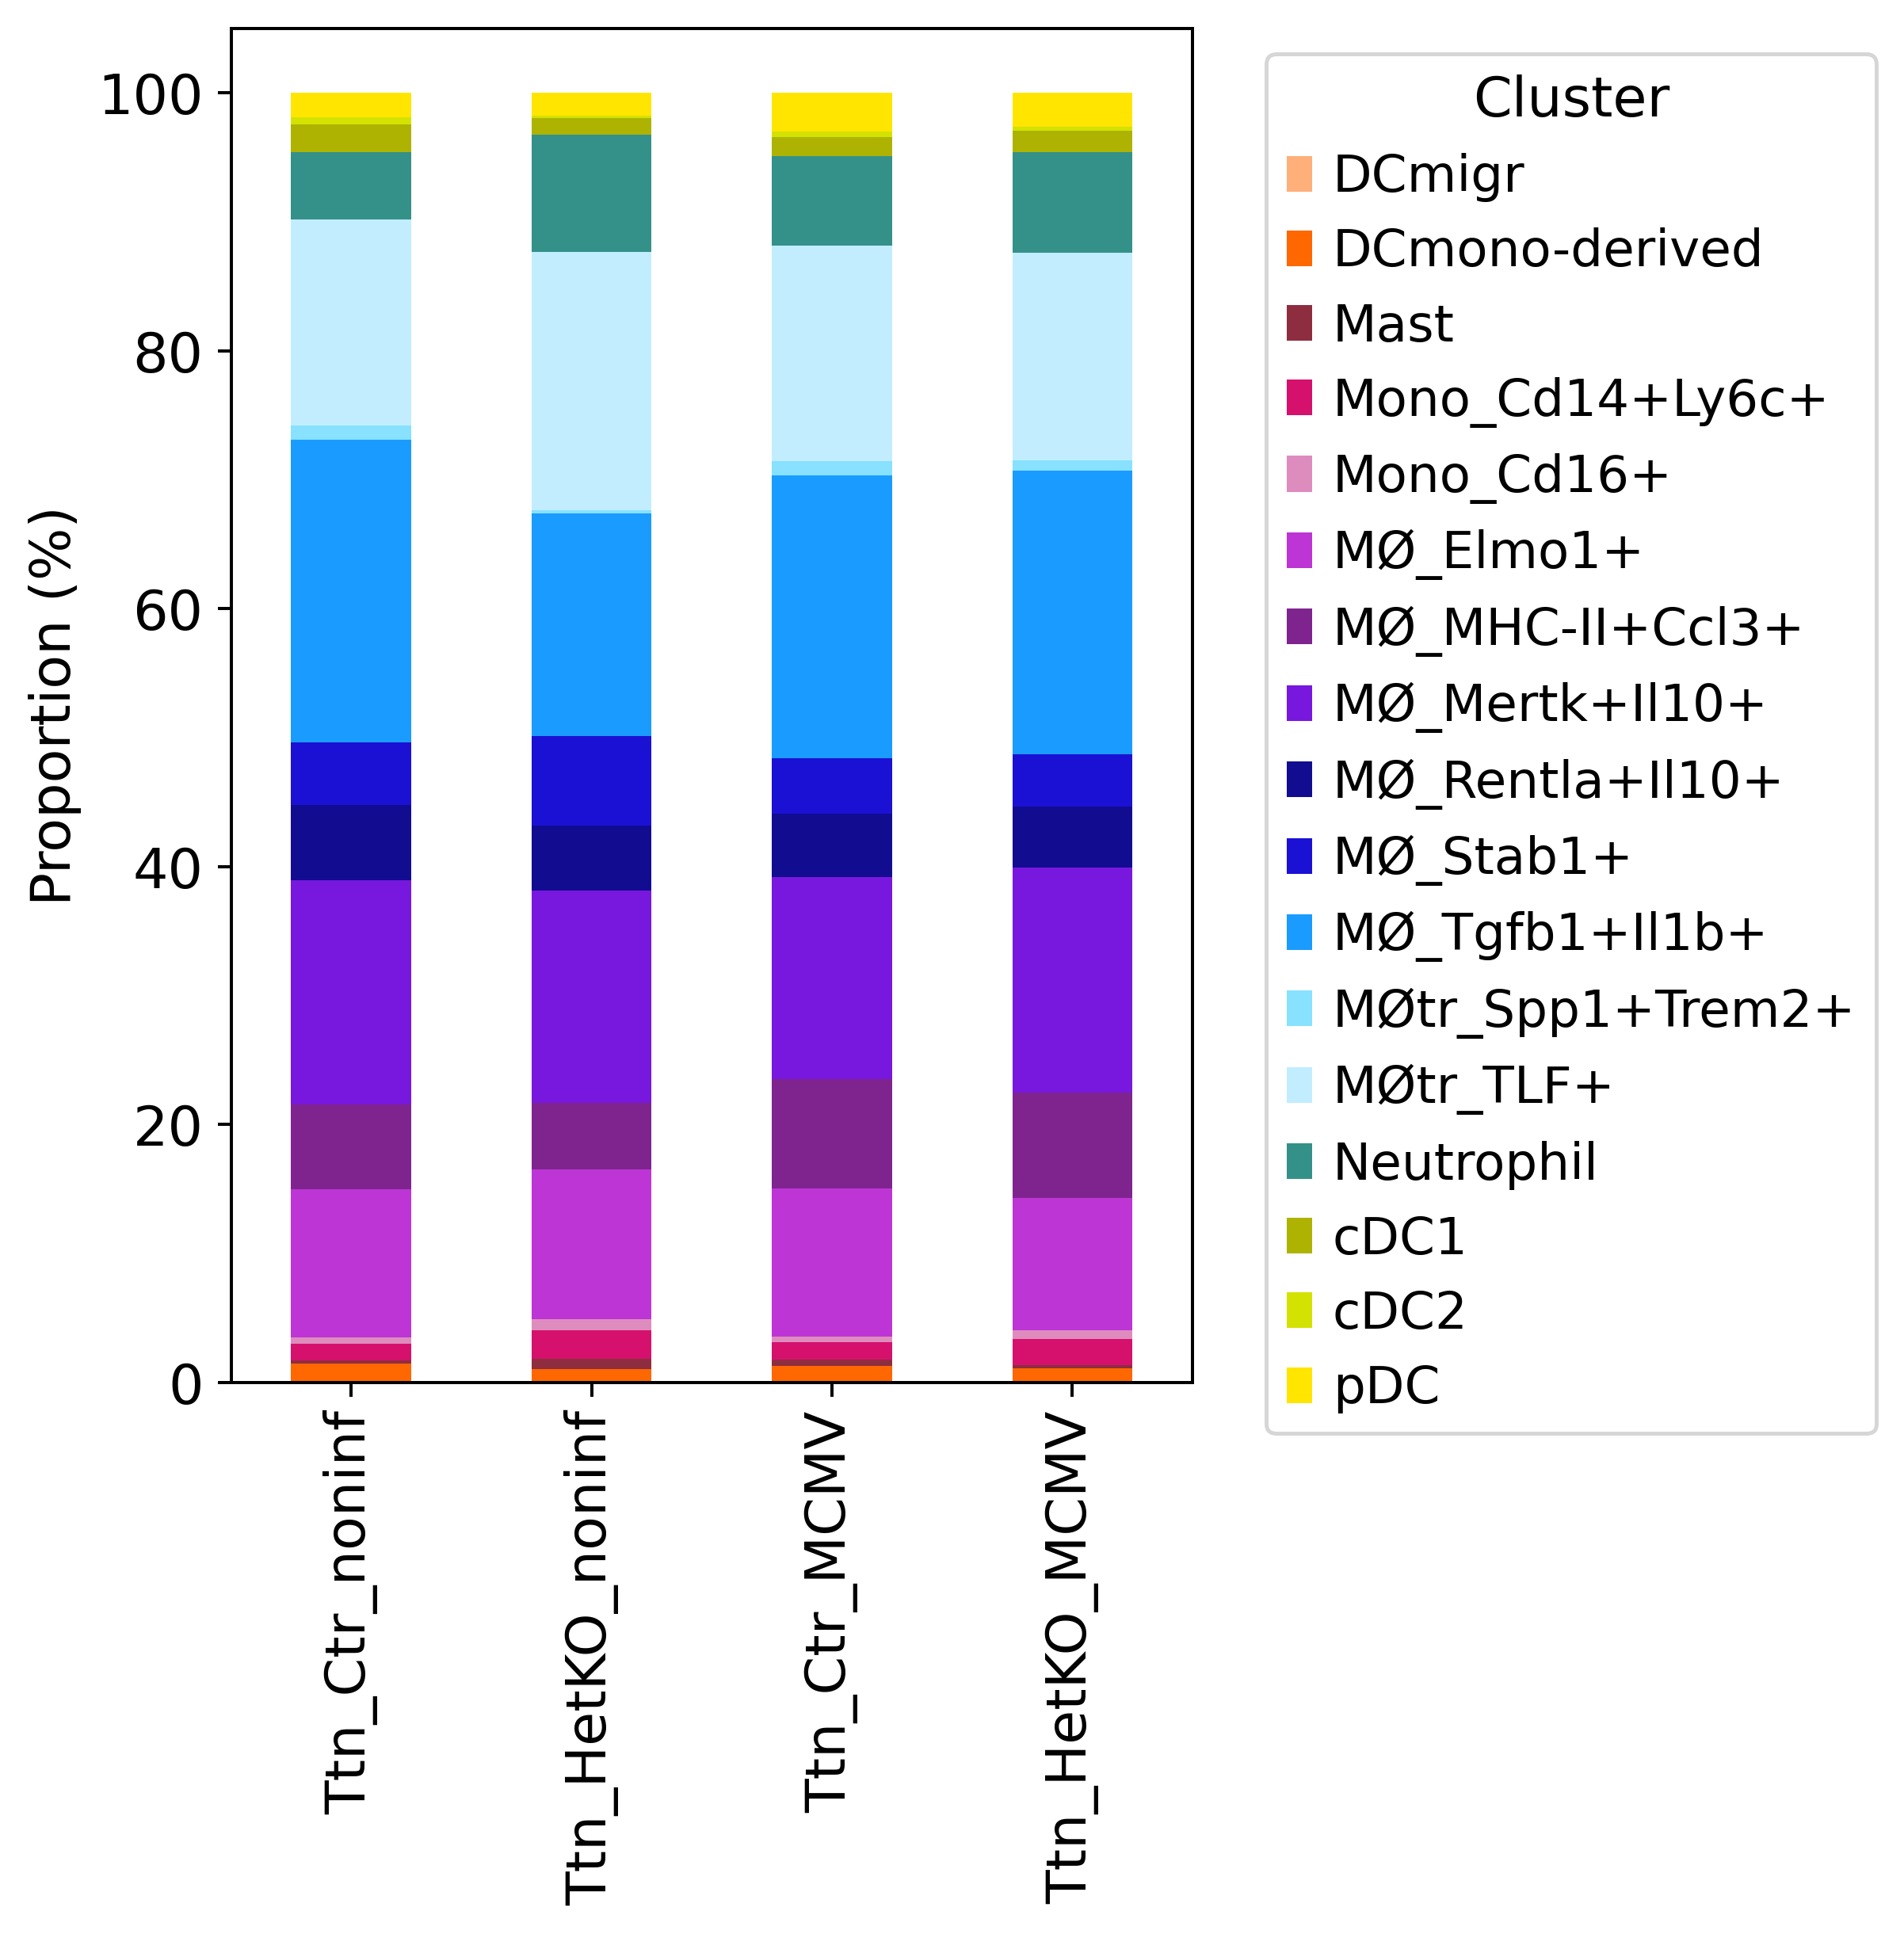

<Axes: ylabel='Proportion (%)'>

In [248]:
stackedbars(adata_myeloids, Ttn_conditions, cmap_myeloids, save_path='Ttn_proportions_myeloids_stacked_barplot.png')


Ttn - lymphoids

<Figure size 720x720 with 0 Axes>

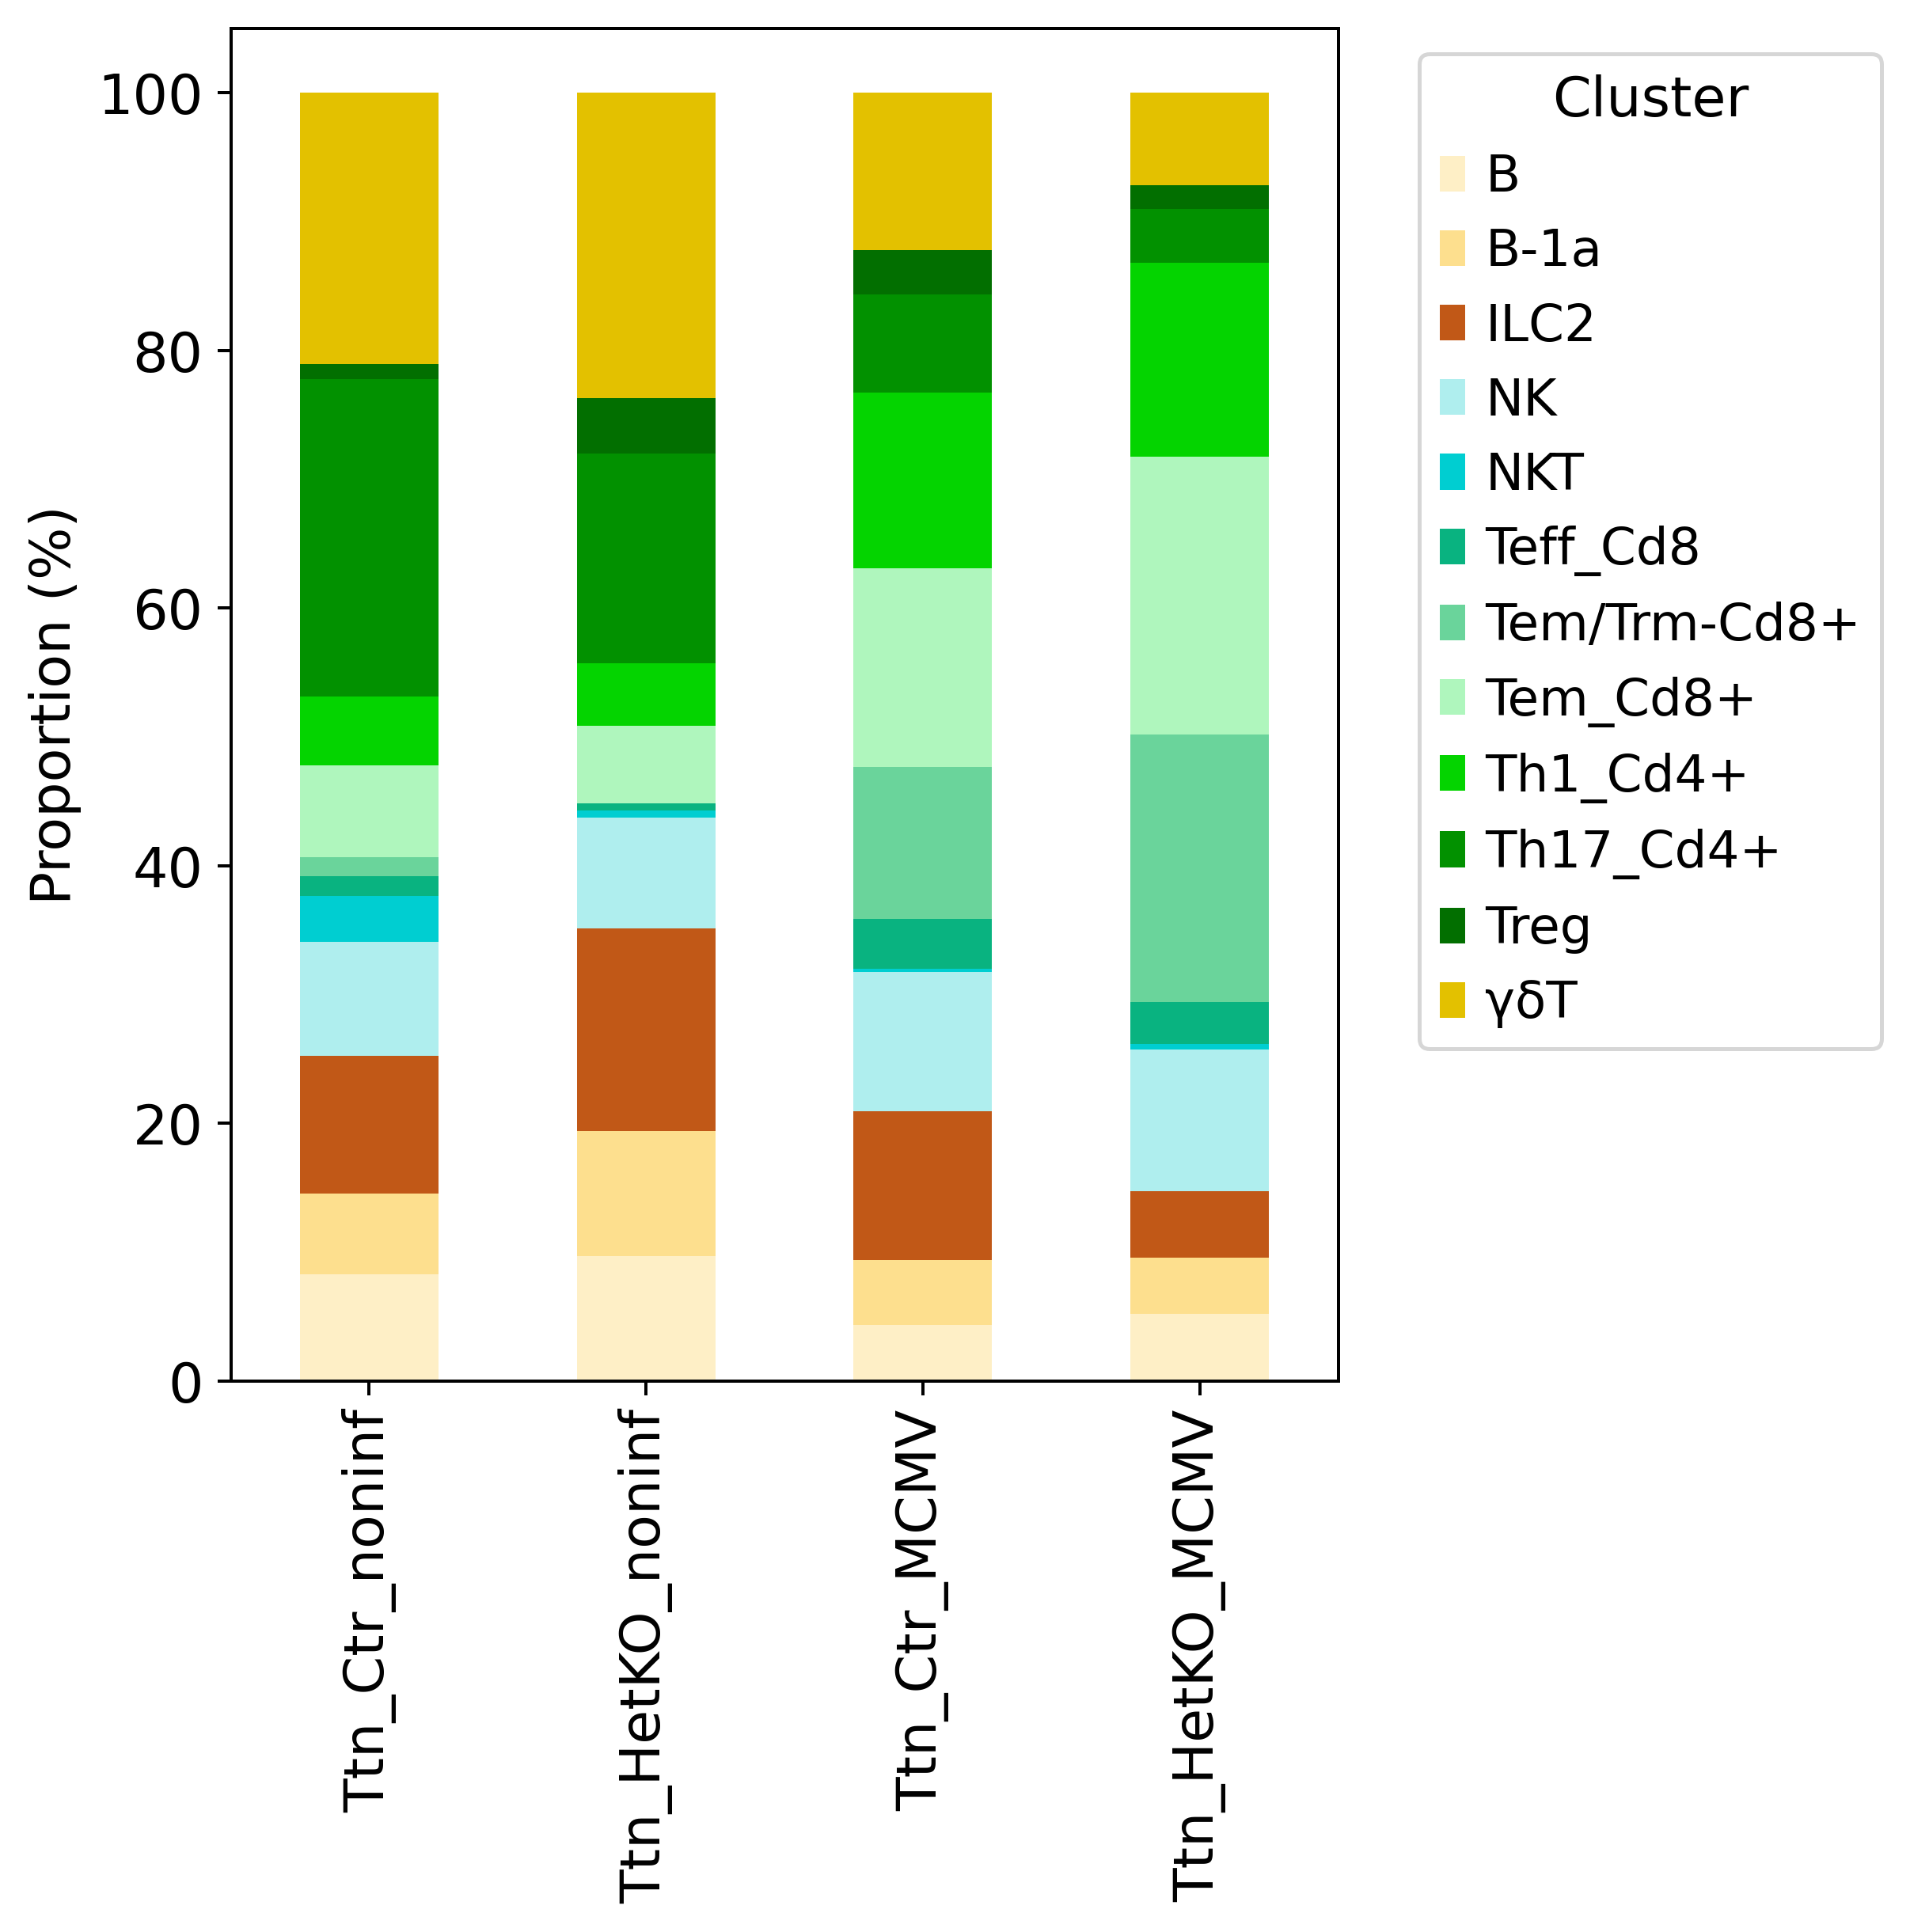

<Axes: ylabel='Proportion (%)'>

In [249]:
stackedbars(adata_lymphoids, Ttn_conditions, cmap_lymphoids, save_path='Ttn_proportions_lymphoids_stacked_barplot.png')

### Condition Proportions in Cell types

Pkp2

<Figure size 720x720 with 0 Axes>

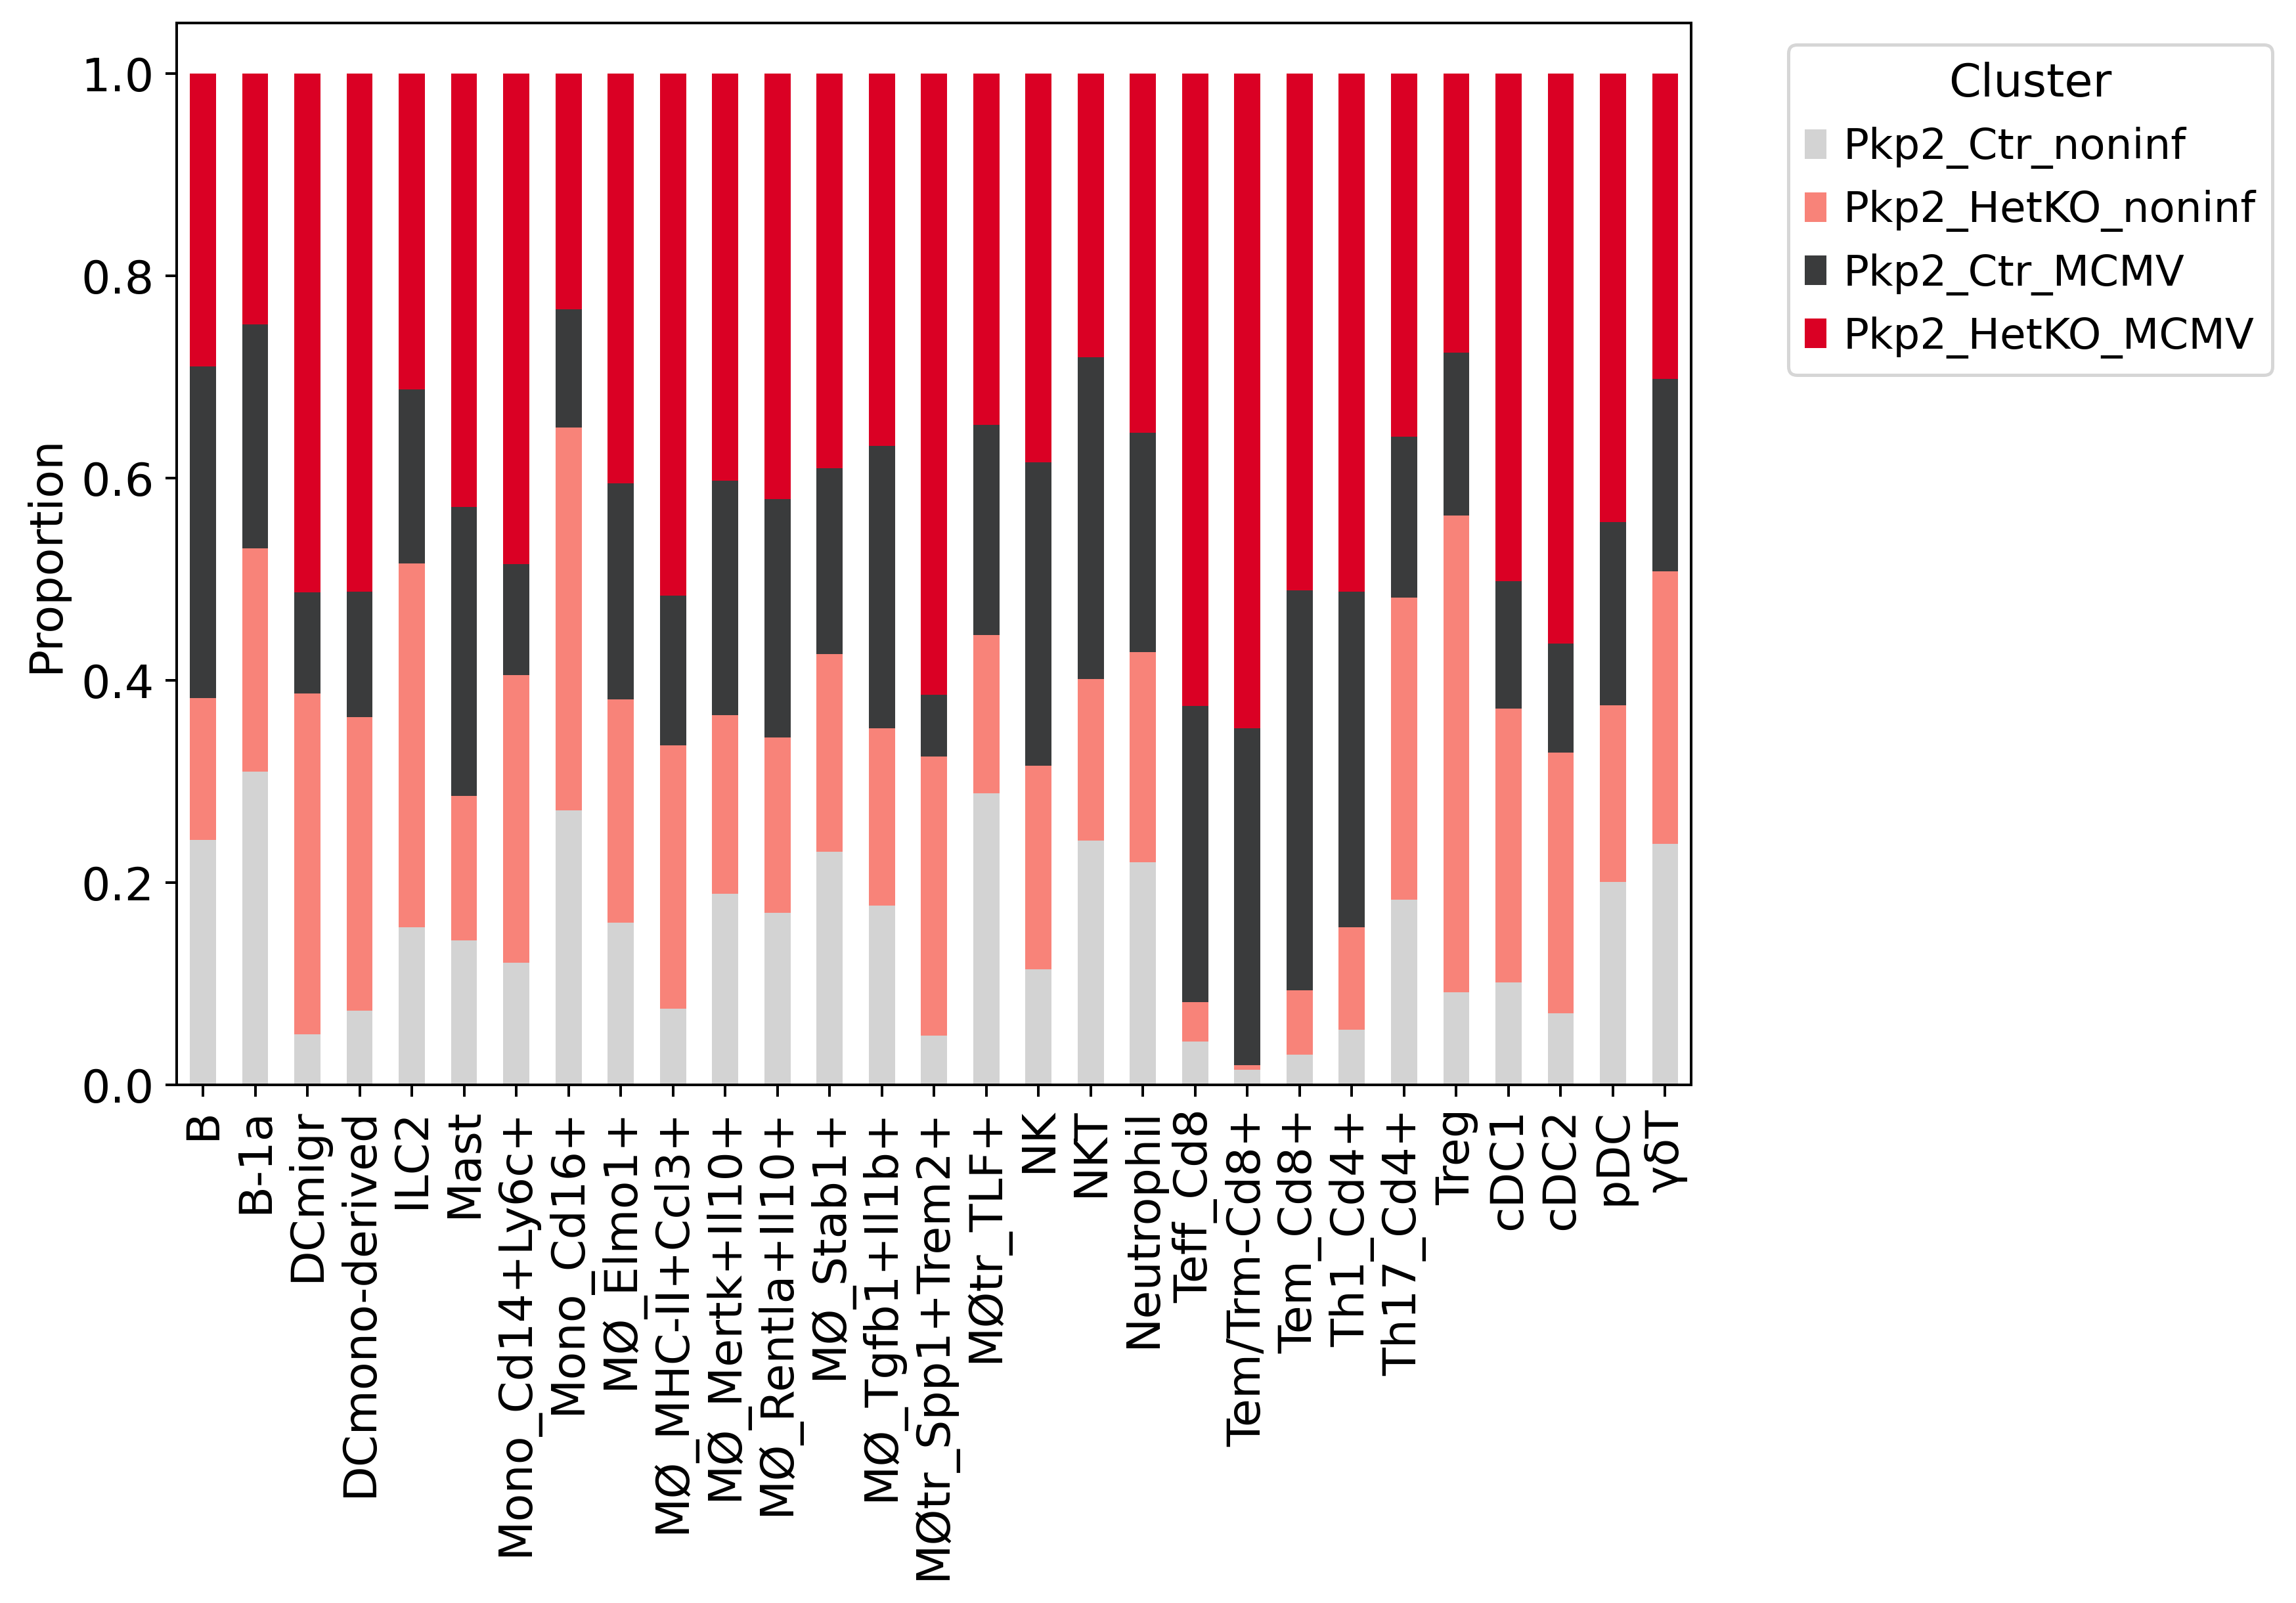

In [250]:
df_classification = adata.obs.groupby(['annotation', 'condition']).size().reset_index(name='counts')
total_counts = df_classification.groupby('annotation')['counts'].transform('sum')
df_classification['proportions'] = df_classification['counts'] / total_counts

df_Pkp2 = df_classification[df_classification['condition'].isin(Pkp2_conditions)]
df_Pkp2 = df_Pkp2.set_index('condition').loc[Pkp2_conditions].reset_index()

pivot_df = df_Pkp2.pivot(index='annotation', columns='condition', values='proportions').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_conditions, edgecolor='none')
plt.gcf().set_size_inches(10, 7)
ax.grid(False)
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Pkp2_condition_proportions_in_annotation.png', dpi=300)
plt.show()


<Figure size 720x720 with 0 Axes>

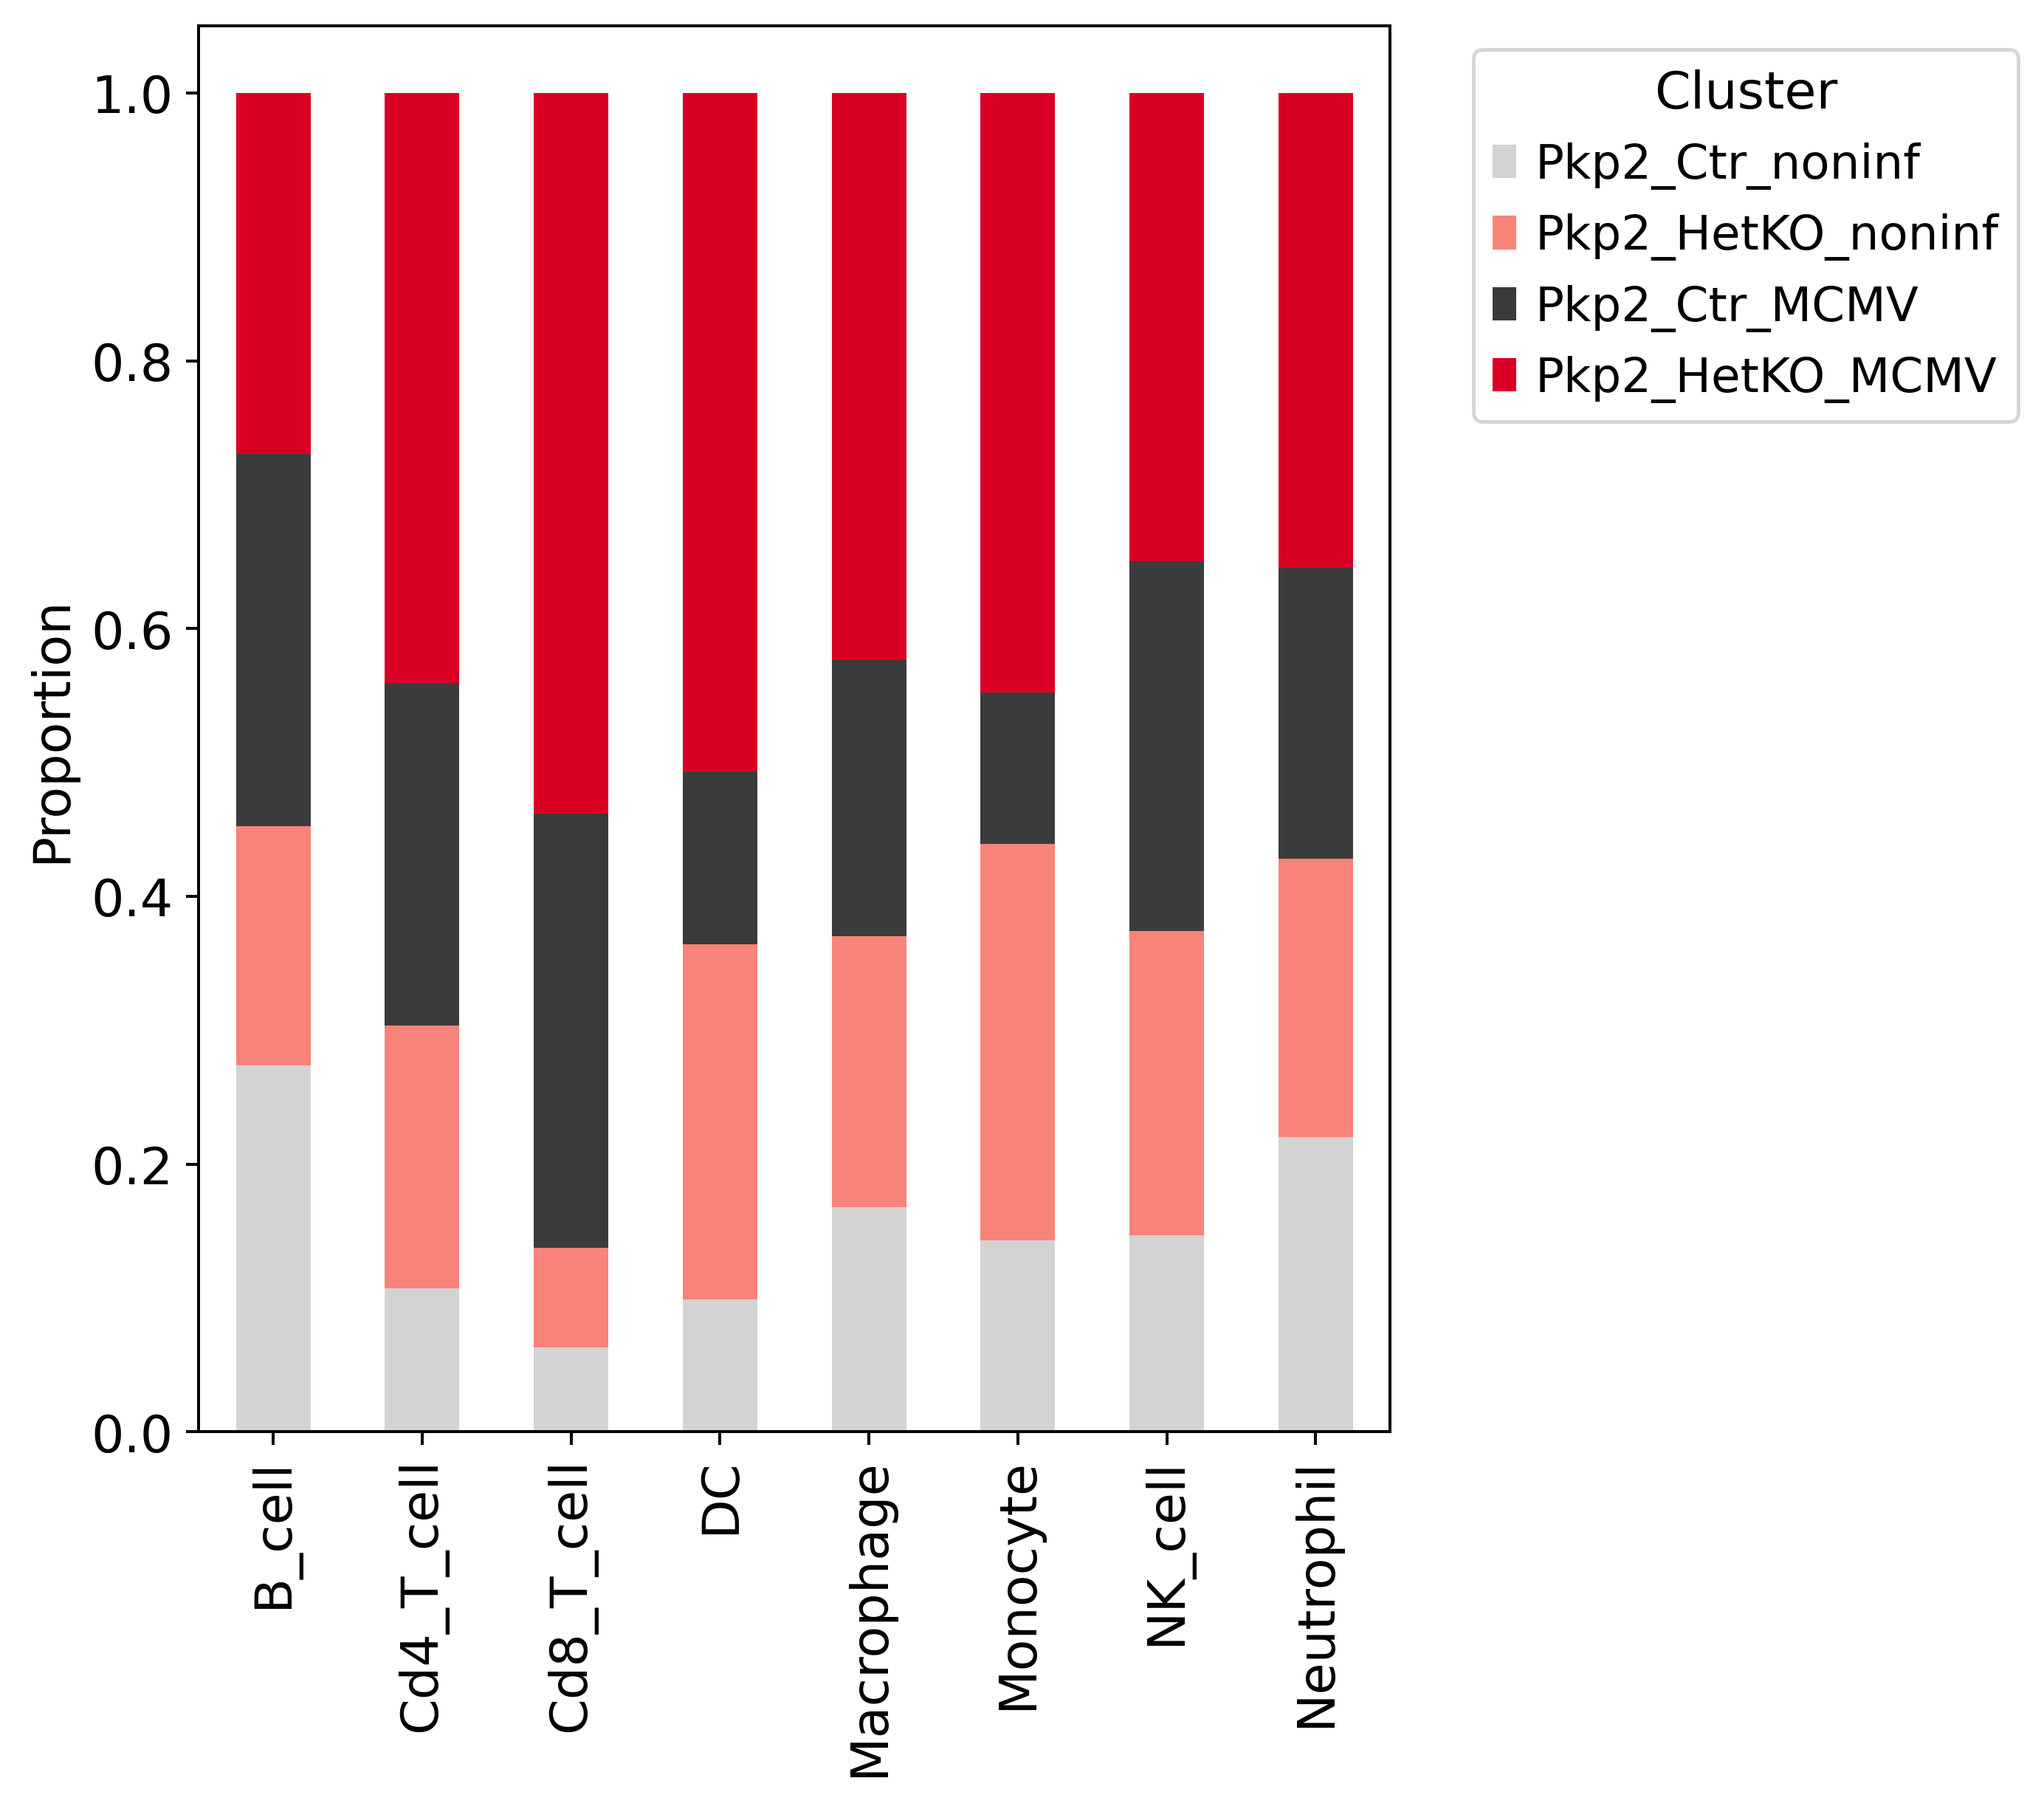

In [251]:
df_classification = adata.obs.groupby(['general_celltype', 'condition']).size().reset_index(name='counts')
total_counts = df_classification.groupby('general_celltype')['counts'].transform('sum')
df_classification['proportions'] = df_classification['counts'] / total_counts

df_Pkp2 = df_classification[df_classification['condition'].isin(Pkp2_conditions)]
df_Pkp2 = df_Pkp2.set_index('condition').loc[Pkp2_conditions].reset_index()

pivot_df = df_Pkp2.pivot(index='general_celltype', columns='condition', values='proportions').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_conditions, edgecolor='none')
plt.gcf().set_size_inches(8, 7)
ax.grid(False)
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Pkp2_condition_proportions_in_general_celltypes.png', dpi=300)
plt.show()

Ttn

<Figure size 720x720 with 0 Axes>

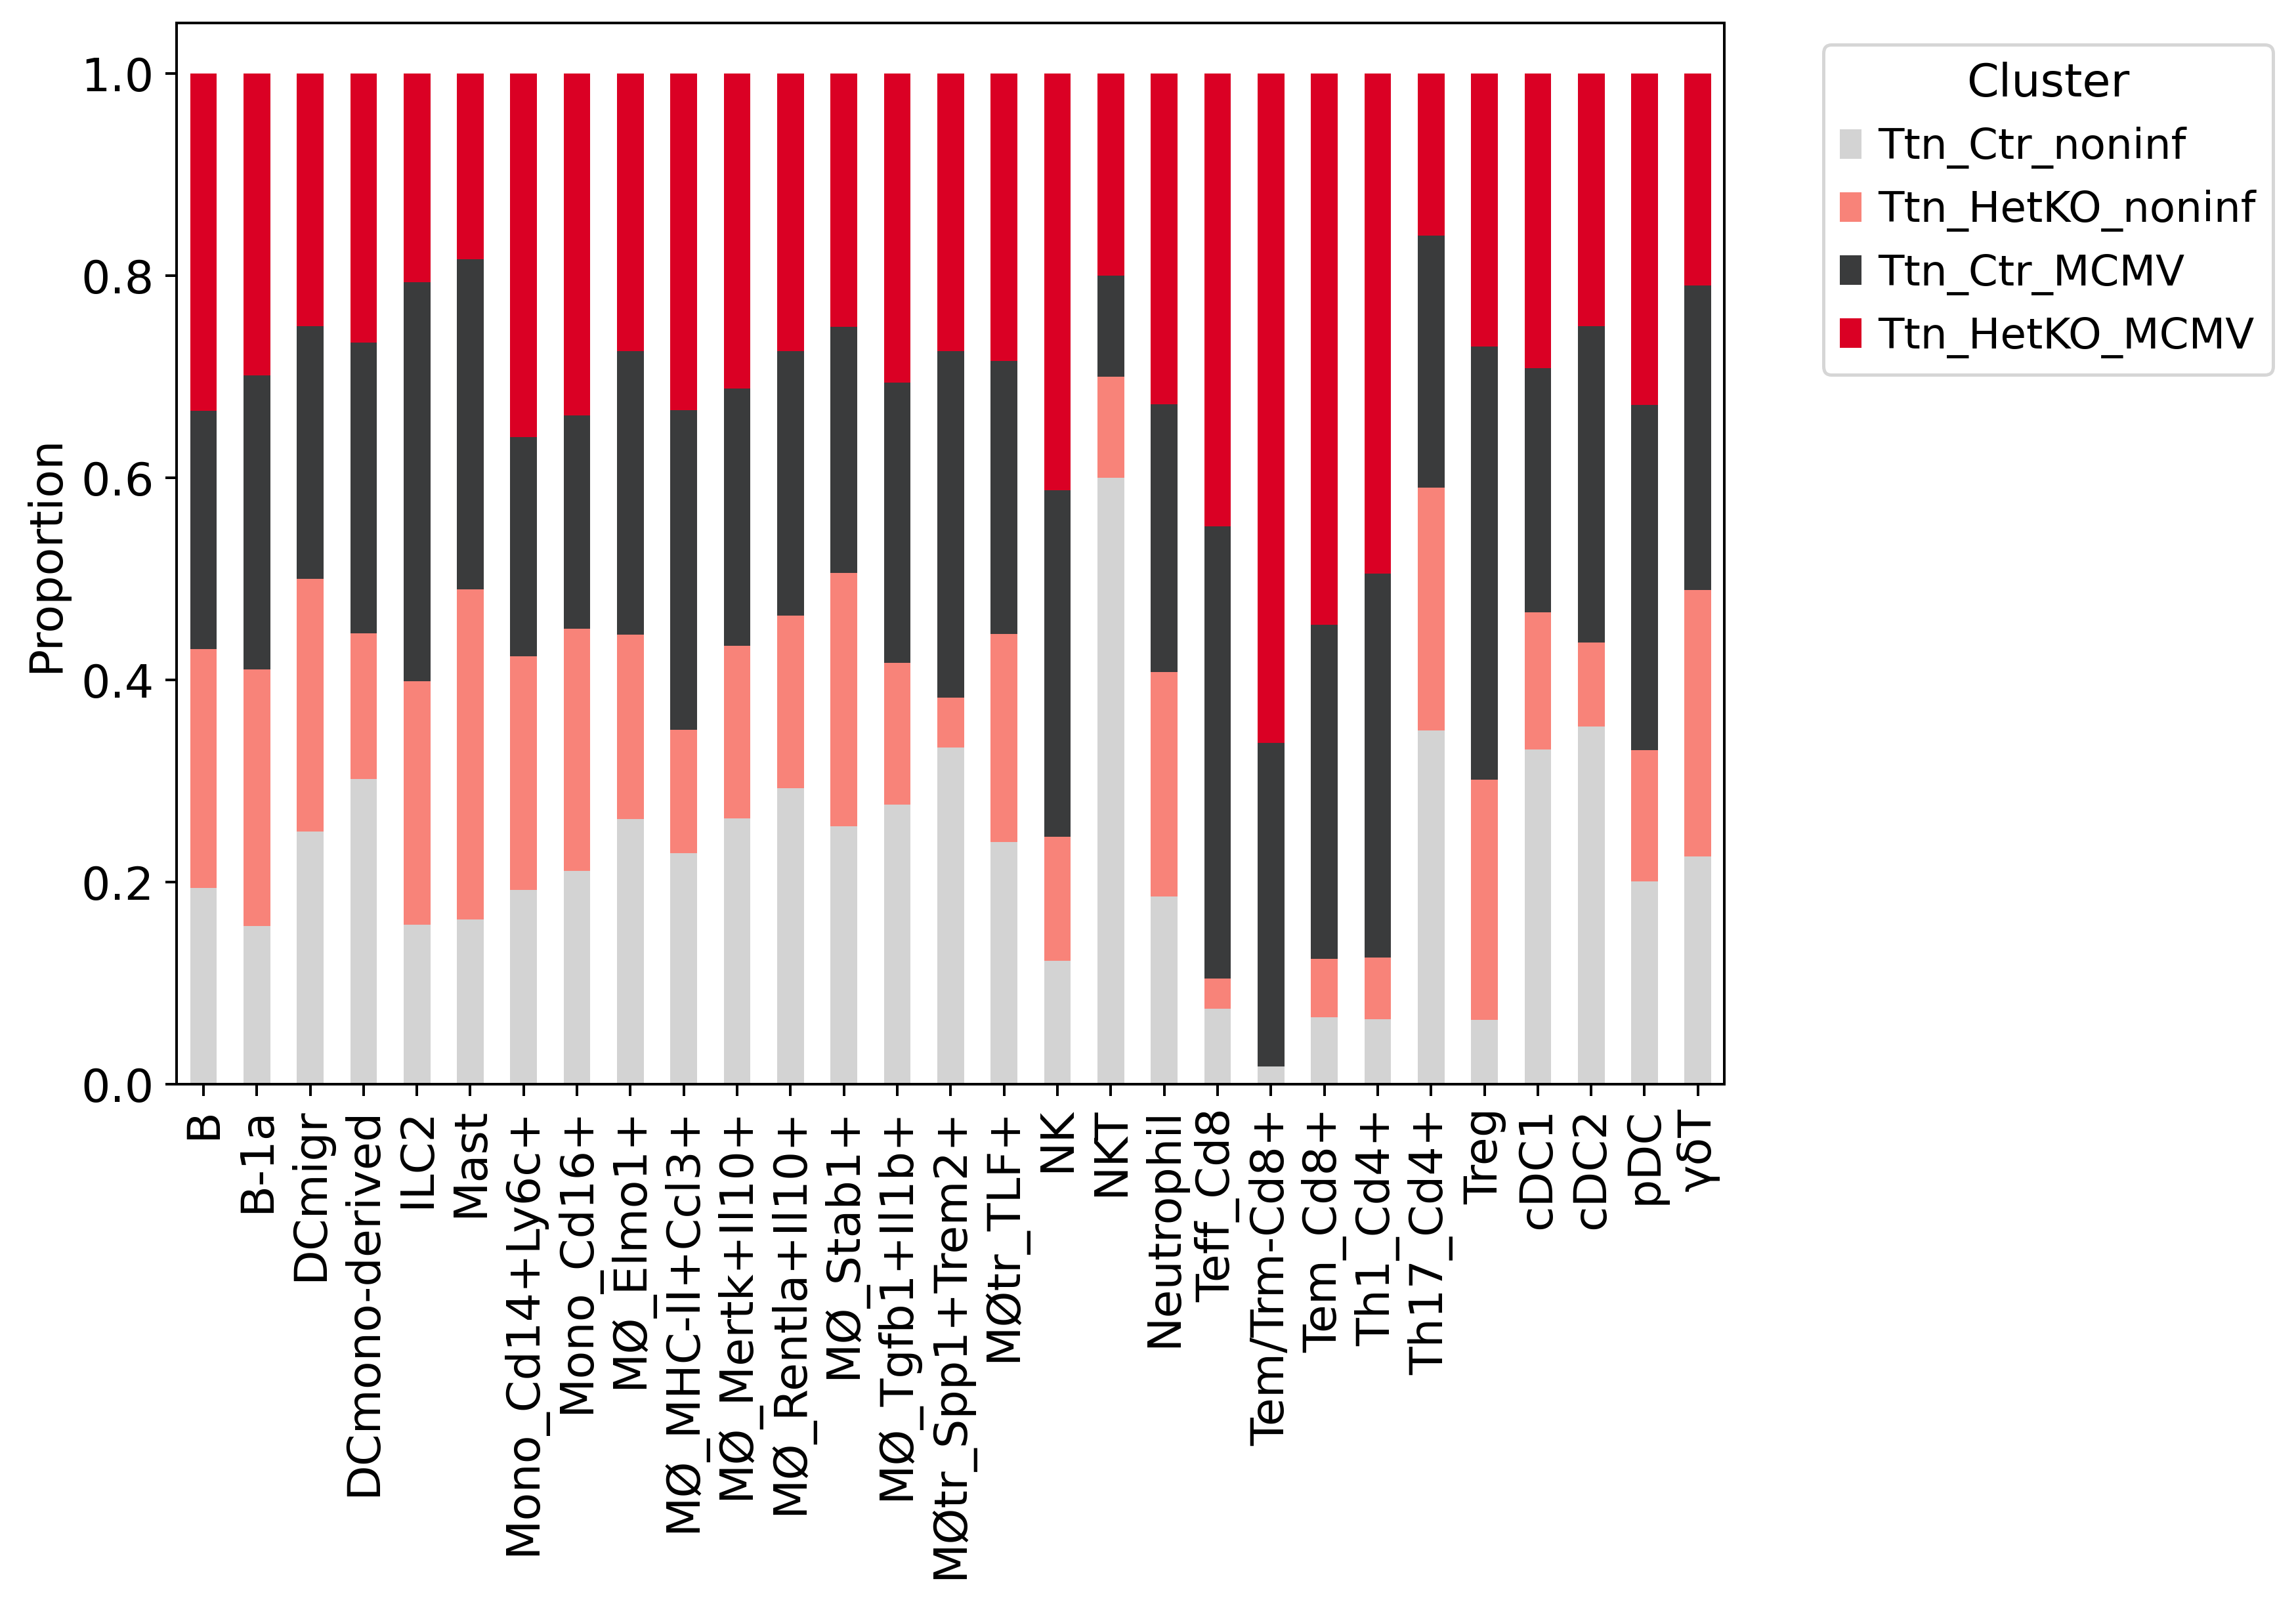

In [252]:
df_classification = adata.obs.groupby(['annotation', 'condition']).size().reset_index(name='counts')
total_counts = df_classification.groupby('annotation')['counts'].transform('sum')
df_classification['proportions'] = df_classification['counts'] / total_counts

df_Ttn = df_classification[df_classification['condition'].isin(Ttn_conditions)]
df_Ttn = df_Ttn.set_index('condition').loc[Ttn_conditions].reset_index()

pivot_df = df_Ttn.pivot(index='annotation', columns='condition', values='proportions').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_conditions, edgecolor='none')
plt.gcf().set_size_inches(10, 7)
ax.grid(False)
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Ttn_condition_proportions_in_annotation.png', dpi=300)
plt.show()

<Figure size 720x720 with 0 Axes>

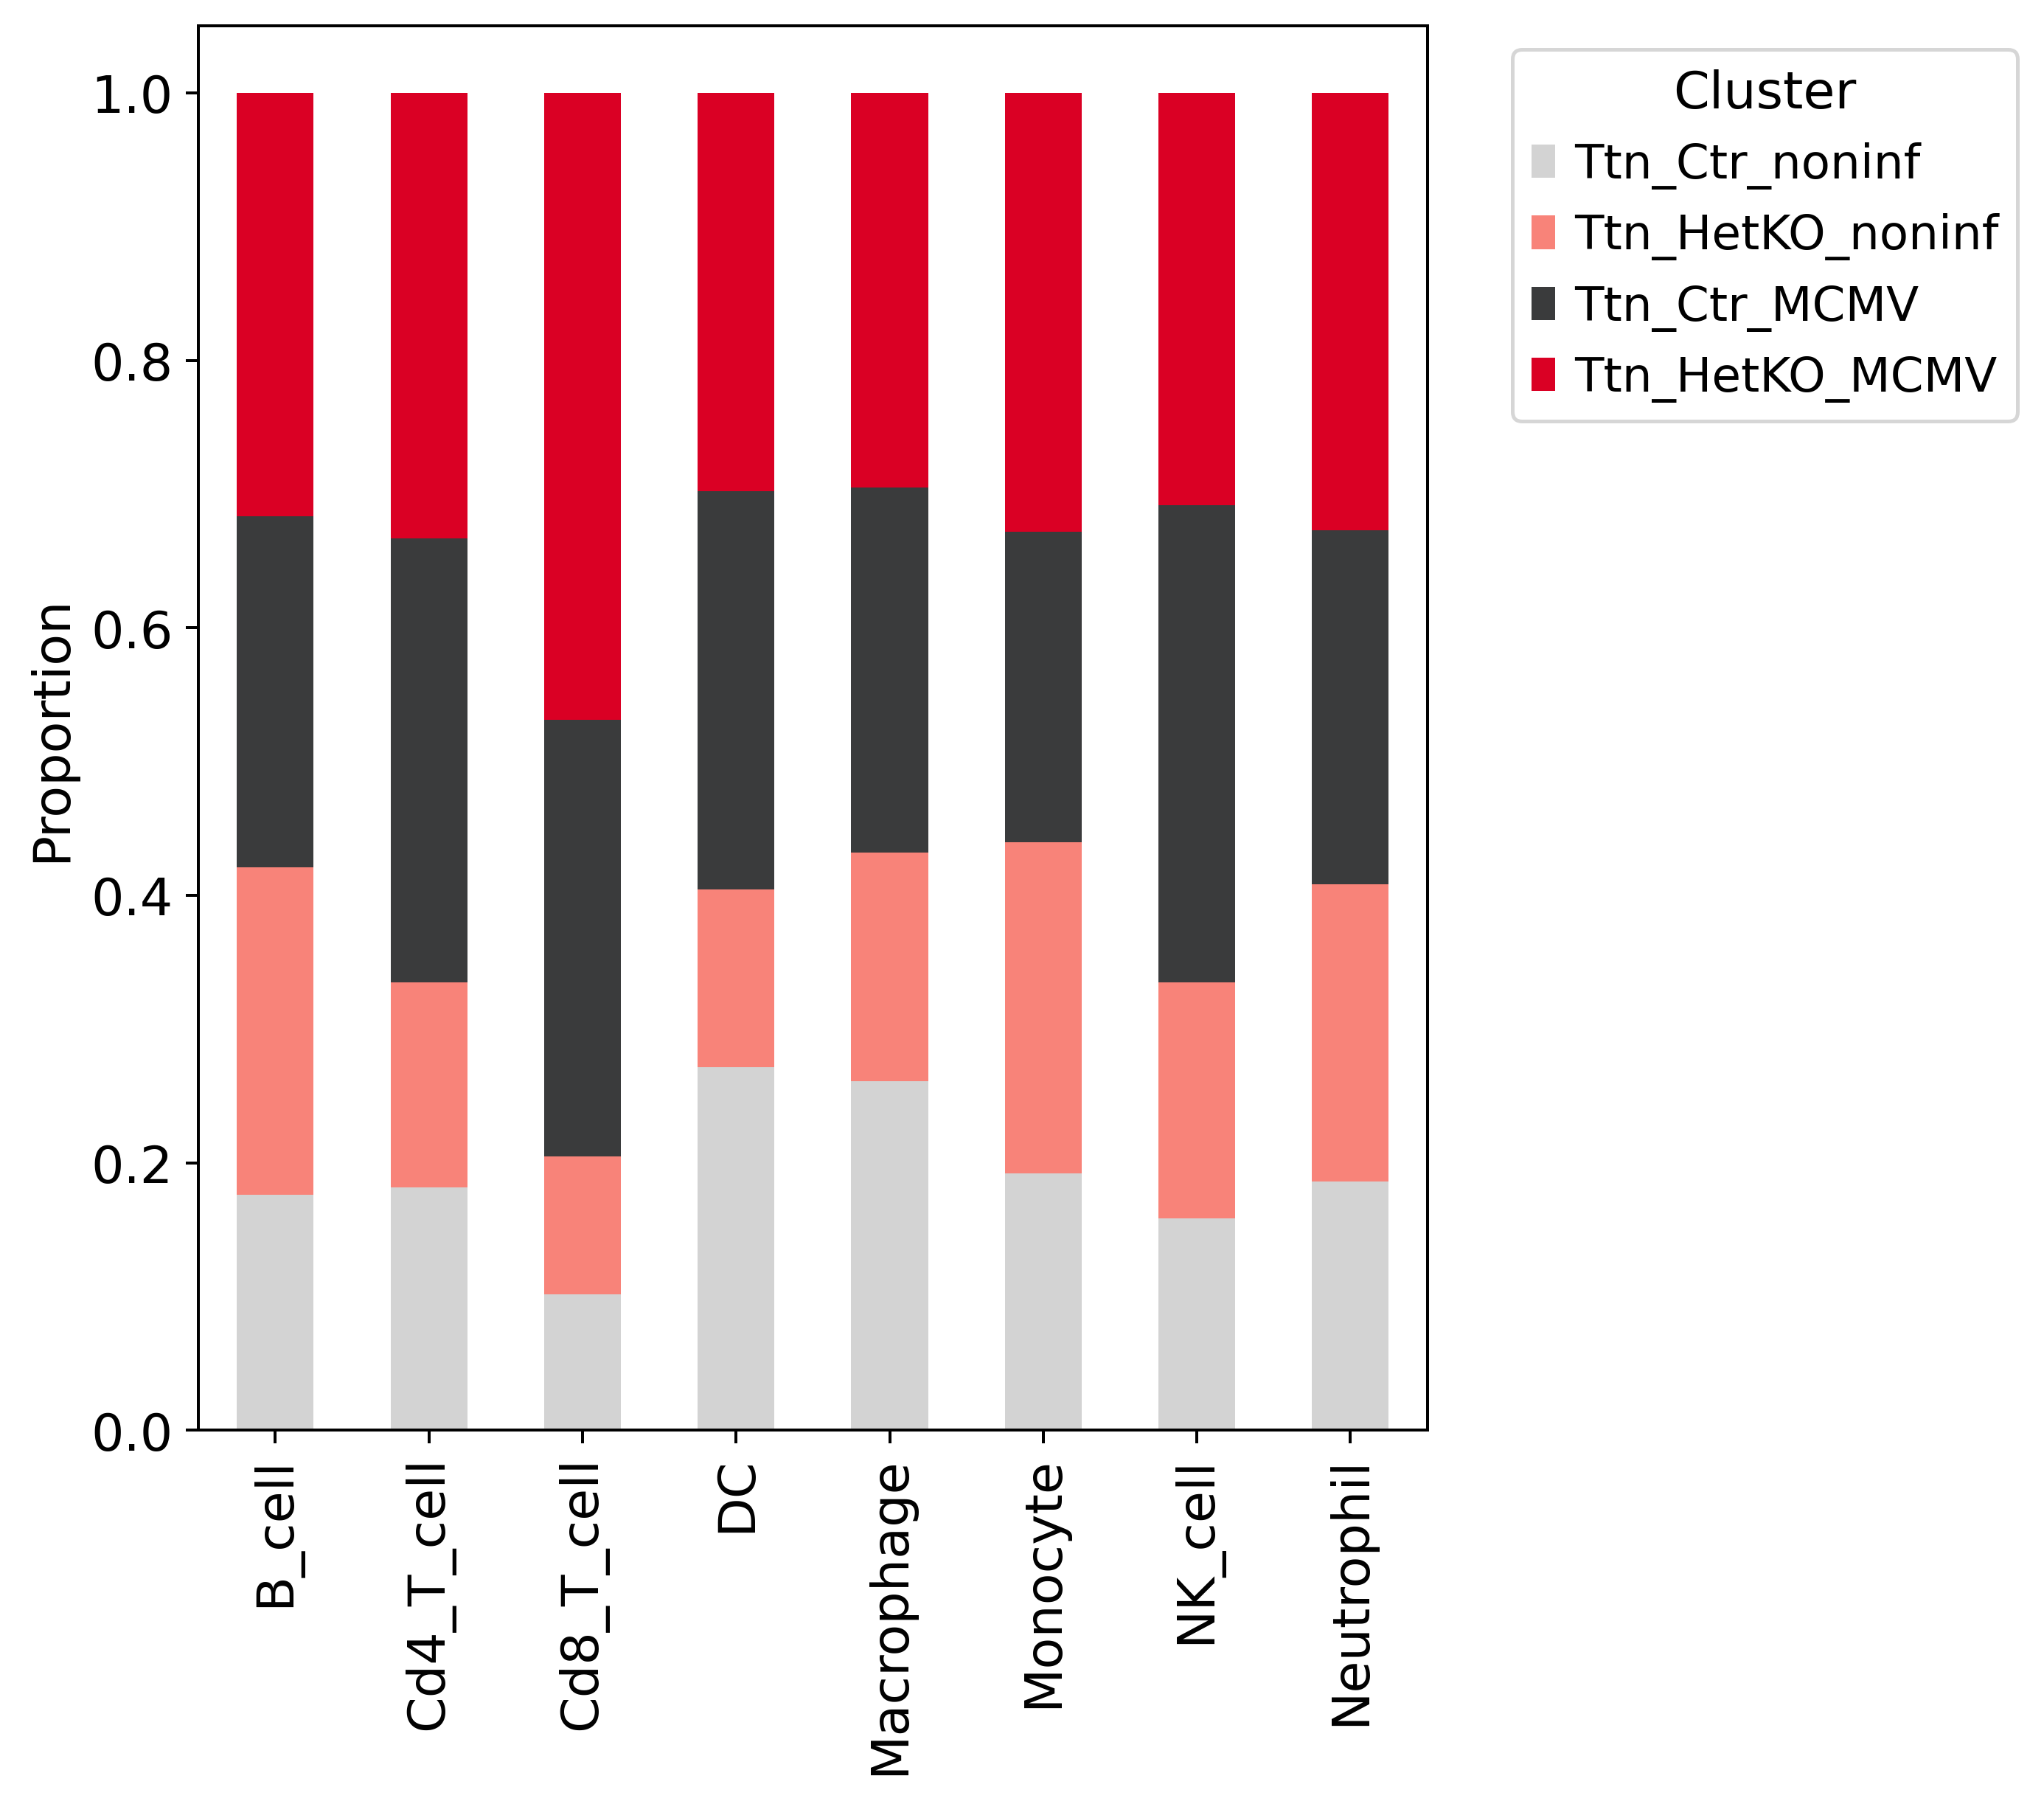

In [253]:
df_classification = adata.obs.groupby(['general_celltype', 'condition']).size().reset_index(name='counts')
total_counts = df_classification.groupby('general_celltype')['counts'].transform('sum')
df_classification['proportions'] = df_classification['counts'] / total_counts

df_Ttn = df_classification[df_classification['condition'].isin(Ttn_conditions)]
df_Ttn = df_Ttn.set_index('condition').loc[Ttn_conditions].reset_index()

pivot_df = df_Ttn.pivot(index='general_celltype', columns='condition', values='proportions').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_conditions, edgecolor='none')
plt.gcf().set_size_inches(8, 7)
ax.grid(False)
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Ttn_condition_proportions_in_general_celltype.png', dpi=300)
plt.show()

### Export annotated object with raw counts

In [ ]:
adata

In [ ]:
adata_raw

In [ ]:
adata_export = anndata.AnnData(X = adata_raw.X, obs = adata.obs, var = adata_raw.var)
adata_export.obsm['X_scVI'] = adata.obsm['X_scVI'].copy()
adata_export.obsm['X_umap'] = adata.obsm['X_umap'].copy()
adata_export.obsm['X_scANVI'] = adata.obsm['X_scANVI'].copy()
adata_export

#### Update the mdata object

In [ ]:
mdata.mod['rna'] = adata_export
mdata

In [ ]:
mdata.mod['rna'].obs_names

In [ ]:
mdata.mod['prot'].obs_names

In [ ]:
rna_cells_export = set(mdata.mod['rna'].obs_names)
mask = mdata.mod['prot'].obs_names.isin(rna_cells_export)
filtered_prot_export = mdata.mod['prot'][mask]
mdata = mu.MuData({"rna": mdata.mod['rna'], "prot": filtered_prot_export})
mdata

In [ ]:
mdata.write('/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_seed-label_new_annotation_muon_ac240725.raw.h5mu')

#### Create stacked barplots in addition to waffle plots

In [ ]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')
warnings.simplefilter(action = 'ignore')
scvi.settings.seed = 1712
%config InlineBackend.print_figure_kwargs = {'facecolor' : "w"}
%config InlineBackend.figure_format = 'retina'
torch.set_float32_matmul_precision('medium')
arches_params = dict(
    use_layer_norm = "both",
    use_batch_norm = "none",
    encode_covariates = True,
    dropout_rate = 0.2,
    n_layers = 3,
)

In [ ]:
mdata = mu.read_h5mu('/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_seed-label_new_annotation_muon_ac240725.raw.h5mu')     

In [ ]:
adata = mdata.mod['rna']
adata

In [ ]:
df_condition = adata.obs.groupby(['condition', 'C_scANVI']).size().reset_index(name = 'counts')

grouped = df_condition.groupby('condition')['counts'].apply(lambda x: x / x.sum() * 100)
grouped = grouped.reset_index()

df_condition['proportions'] = grouped['counts']
df_condition.head(10)

In [ ]:
Pkp2_conditions = ["Pkp2_Ctr_noninf", "Pkp2_HetKO_noninf","Pkp2_Ctr_MCMV", "Pkp2_HetKO_MCMV"]
df_Pkp2 = df_condition[df_condition['condition'].isin(Pkp2_conditions)]
df_Pkp2 = df_Pkp2.set_index('condition').loc[Pkp2_conditions].reset_index()

In [ ]:
#Define a color map
cmap_ac = ['#FEEFC6','#FDDF8E','#FFAF7A','#FF6700','#C15817','#8F2D40','#D5116D','#DE8CBE', '#BD35D5', '#7F248F','#7818DE', '#120C91', '#1B11D4', '#1A9BFF', '#87E1FF',  '#C2EDFF', '#AFEEEE', '#00CED1', '#349189', 
                          '#09B380','#6AD49B', '#AFF6BD', '#04D400', '#029100', '#026F00','#ADB300', '#D3E200', '#FFE500', '#E3C100']  

# Pivot the DataFrame to have 'leiden' clusters as columns
pivot_df = df_Pkp2.pivot(index='condition', columns='C_scANVI', values='proportions').fillna(0)

# Plot the stacked barplot
plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_ac, edgecolor='none')

# Set the figure size explicitly after creating the figure
plt.gcf().set_size_inches(7, 7)

# Remove the grid
ax.grid(False)

# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('stacked_barplot_Pkp2.png', dpi=300)
plt.show()


In [ ]:
Ttn_conditions = ["Ttn_Ctr_noninf", "Ttn_HetKO_noninf","Ttn_Ctr_MCMV", "Ttn_HetKO_MCMV"]
df_Ttn = df_condition[df_condition['condition'].isin(Ttn_conditions)]
df_Ttn = df_Ttn.set_index('condition').loc[Ttn_conditions].reset_index()

In [ ]:
#Define a color map
cmap_ac = ['#FEEFC6','#FDDF8E','#FFAF7A','#FF6700','#C15817','#8F2D40','#D5116D','#DE8CBE', '#BD35D5', '#7F248F','#7818DE', '#120C91', '#1B11D4', '#1A9BFF', '#87E1FF',  '#C2EDFF', '#AFEEEE', '#00CED1', '#349189', 
                          '#09B380','#6AD49B', '#AFF6BD', '#04D400', '#029100', '#026F00','#ADB300', '#D3E200', '#FFE500', '#E3C100'] 

# Pivot the DataFrame to have 'leiden' clusters as columns
pivot_df = df_Ttn.pivot(index='condition', columns='C_scANVI', values='proportions').fillna(0)

# Plot the stacked barplot
plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_ac, edgecolor='none')

# Set the figure size explicitly after creating the figure
plt.gcf().set_size_inches(7, 7)

# Remove the grid
ax.grid(False)

# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('stacked_barplot_Ttn.png', dpi=300)
plt.show()

In [ ]:

df_classification = adata.obs.groupby(['C_scANVI', 'condition']).size().reset_index(name='counts')
total_counts = df_classification.groupby('C_scANVI')['counts'].transform('sum')
df_classification['proportions'] = df_classification['counts'] / total_counts

Pkp2_conditions = ["Pkp2_Ctr_noninf", "Pkp2_HetKO_noninf","Pkp2_Ctr_MCMV", "Pkp2_HetKO_MCMV"]
df_Pkp2 = df_classification[df_classification['condition'].isin(Pkp2_conditions)]
df_Pkp2 = df_Pkp2.set_index('condition').loc[Pkp2_conditions].reset_index()

pivot_df = df_Pkp2.pivot(index='C_scANVI', columns='condition', values='proportions').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

cmap_ac = ['#D3D3D3','#F88379','#3A3B3C','#DA0024']  

plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_ac, edgecolor='none')
plt.gcf().set_size_inches(10, 7)
ax.grid(False)
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stacked_barplot_classification_in_Pkp2.png', dpi=300)
plt.show()


In [ ]:

df_classification = adata.obs.groupby(['C_scANVI', 'condition']).size().reset_index(name='counts')
total_counts = df_classification.groupby('C_scANVI')['counts'].transform('sum')
df_classification['proportions'] = df_classification['counts'] / total_counts

Pkp2_conditions = ["Ttn_Ctr_noninf", "Ttn_HetKO_noninf","Ttn_Ctr_MCMV", "Ttn_HetKO_MCMV"]
df_Pkp2 = df_classification[df_classification['condition'].isin(Pkp2_conditions)]
df_Pkp2 = df_Pkp2.set_index('condition').loc[Pkp2_conditions].reset_index()

pivot_df = df_Pkp2.pivot(index='C_scANVI', columns='condition', values='proportions').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

cmap_ac = ['#D3D3D3','#F88379','#3A3B3C','#DA0024']  

plt.figure()  # Create a new figure
ax = pivot_df.plot(kind='bar', stacked=True, color=cmap_ac, edgecolor='none')
plt.gcf().set_size_inches(10, 7)
ax.grid(False)
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stacked_barplot_classification_in_Pkp2.png', dpi=300)
plt.show()
